# Libraries

In [1]:
import sys
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import SpectralClustering, KMeans
import numpy as np
import matplotlib.pyplot as plt

# Versions

In [2]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.2.1


# Datasets

In [3]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")
twogaussians42_csv = pd.read_csv("data/twogaussians42.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

X_twogaussians42 = twogaussians42_csv[['x1', 'x2']].values
y_twogaussians42 = twogaussians42_csv['label'].values

# Circle

# K-means with Different Distance

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

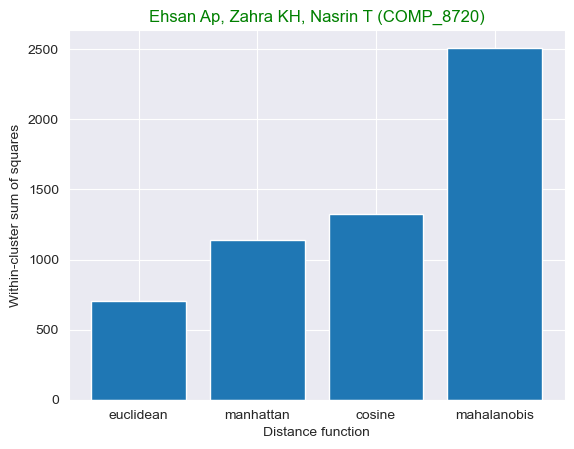

In [4]:
X = circle_csv[['x1', 'x2']].values
y = circle_csv['label'].values

distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

wss_values = []
for distance_function in distance_functions:
    if distance_function == 'manhattan':
        dists = pairwise_distances(X, metric='manhattan')
    else:
        dists = pairwise_distances(X, metric=distance_function)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    wss = sum(np.min(dists[:, kmeans.labels_], axis=1)**2)
    wss_values.append(wss)

fig, ax = plt.subplots()
ax.bar(distance_functions, wss_values)
ax.set_xlabel('Distance function')
ax.set_ylabel('Within-cluster sum of squares')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Kmeans with Different Distance Plot

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

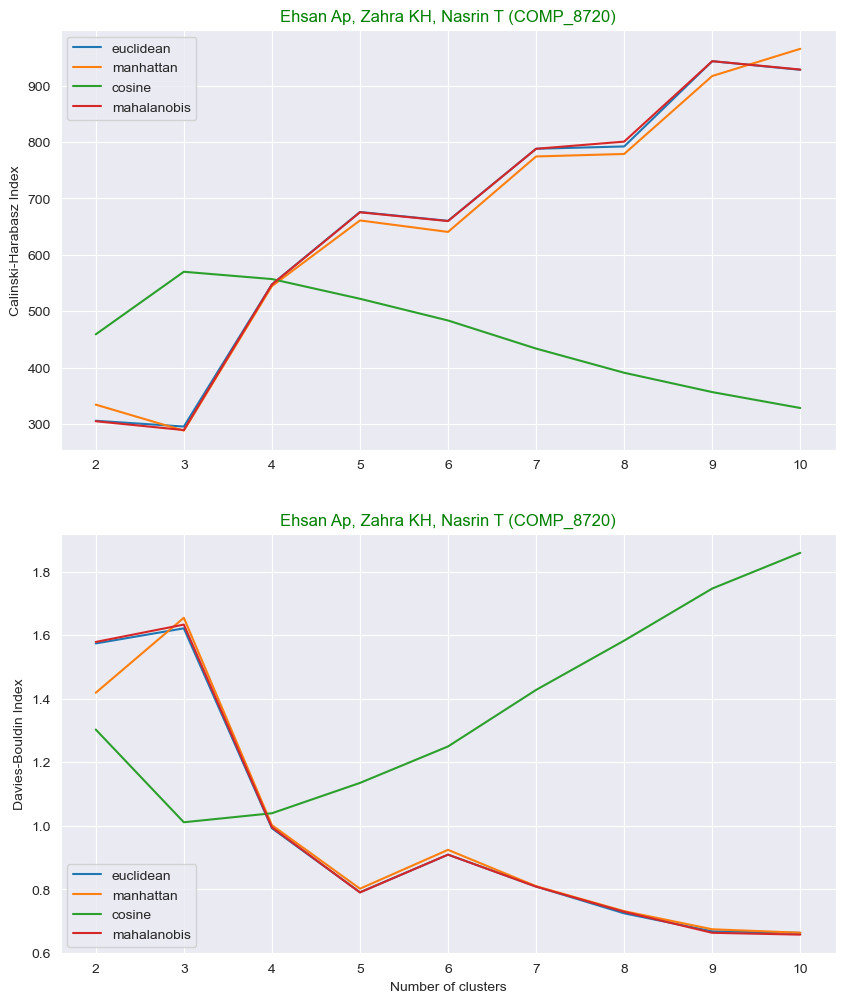

In [69]:
X = circle_csv[['x1', 'x2']].values
y = circle_csv['label'].values

n_clusters_range = range(2, 11)
distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

ch_scores = {}
# silhouette_scores = {}
db_scores = {}

for dist_func in distance_functions:
    ch_scores[dist_func] = []
    # silhouette_scores[dist_func] = []
    db_scores[dist_func] = []

    for n_clusters in n_clusters_range:
        if dist_func == 'mahalanobis':
            dist_matrix = pairwise_distances(X, metric=dist_func, VI=np.linalg.inv(np.cov(X.T)))
        else:
            dist_matrix = pairwise_distances(X, metric=dist_func)
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dist_matrix)

        ch_scores[dist_func].append(calinski_harabasz_score(X, kmeans.labels_))
        # silhouette_scores[dist_func].append(silhouette_score(X, kmeans.labels_))
        db_scores[dist_func].append(davies_bouldin_score(X, kmeans.labels_))

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
x = list(n_clusters_range)

for dist_func in distance_functions:
    axes[0].plot(x, ch_scores[dist_func], label=dist_func)
    # axes[1].plot(x, silhouette_scores[dist_func], label=dist_func)
    axes[1].plot(x, db_scores[dist_func], label=dist_func)

axes[0].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[0].set_ylabel("Calinski-Harabasz Index")
axes[0].legend()
# axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
# axes[1].set_ylabel("Silhouette score")
# axes[1].legend()
axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[1].set_xlabel("Number of clusters")
axes[1].set_ylabel("Davies-Bouldin Index")
axes[1].legend()
plt.show()

In [6]:
X = circle_csv[['x1', 'x2']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

db_scores = []
di_scores = []
ch_scores = []
i_scores = []
xb_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    xb_scores.append(np.sum(min_distances**2) / (k * np.sum(distances**2)))
    i_scores.append(silhouette_score(X, kmeans.labels_, sample_size=5, random_state=48))

    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    center_distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
    intercluster_distances = np.max(center_distances)
    intracluster_distances = np.min(min_distances)
    di_scores.append(intercluster_distances / intracluster_distances)


scores_table = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Davies-Bouldin Index': db_scores,
    'Dunn’s Index': di_scores,
    'Calinski-Harabasz Index': ch_scores,
    'Index I': i_scores,
    'Xie-Beni Index': xb_scores
})

print(scores_table)

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

   Number of Clusters  Davies-Bouldin Index  Dunn’s Index  \
0                   2              1.309131     99.508185   
1                   3              1.010948     16.520221   
2                   4              0.932088    110.359188   
3                   5              0.791192    187.340377   
4                   6              0.688415    212.648605   
5                   7              0.808750    135.982771   
6                   8              0.743900    458.124573   
7                   9              0.667065    242.796898   
8                  10              0.645458    270.380200   

   Calinski-Harabasz Index   Index I  Xie-Beni Index  
0               462.166352 -0.002803        0.129840  
1               570.225310  0.139136        0.033779  
2               562.060727  0.476293        0.013130  
3               686.455657  0.476293        0.004986  
4               755.439654  0.476293        0.002530  
5               786.223529  0.476293        0.001672  
6   

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


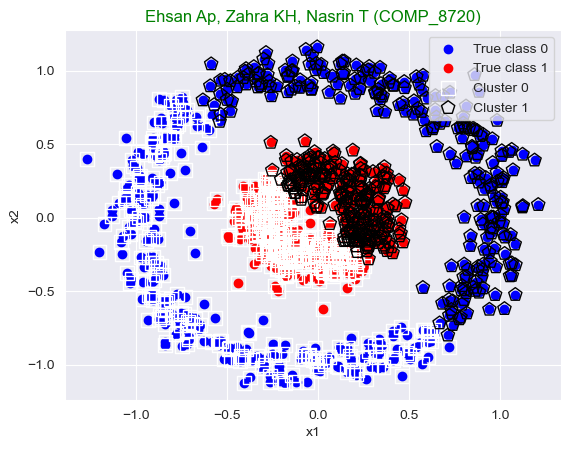

In [120]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

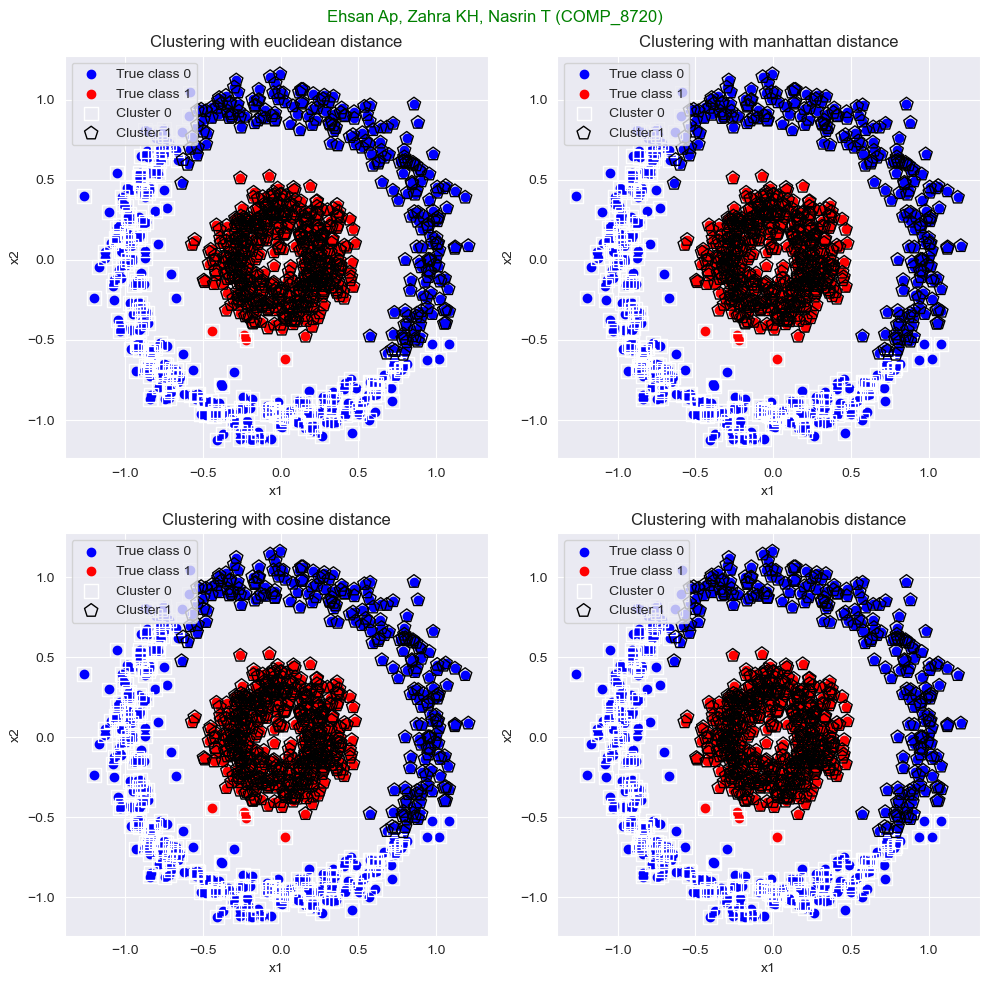

In [126]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']
true_colors = ['blue', 'red']
cluster_markers = ['s', 'p', '^', 'x']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, distance_func in enumerate(distance_functions):
    if dist_func == 'mahalanobis':
        dist_matrix = pairwise_distances(X, metric=dist_func, VI=np.linalg.inv(np.cov(X.T)))
    else:
        dist_matrix = pairwise_distances(X, metric=dist_func)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(dist_matrix)
    # kmeans.fit(X)
    ax = axs[i // 2, i % 2]
    for label, color in zip(y_true.unique(), true_colors):
        mask = y_true == label
        ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
    for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
        mask = kmeans.labels_ == label
        ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(f'Clustering with {distance_func} distance')
    ax.legend()

plt.suptitle("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.tight_layout()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

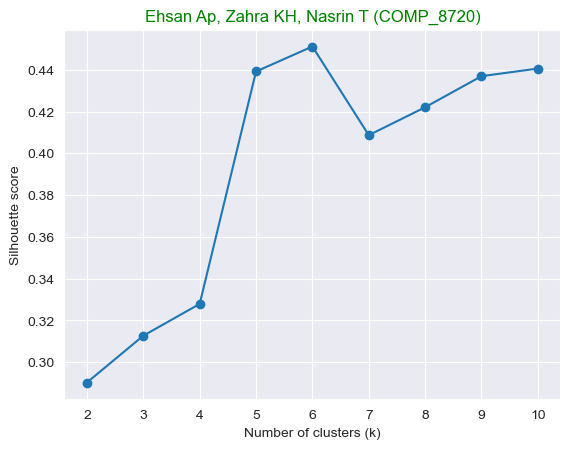

The best value of k is 6


In [9]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_circle)
    score = silhouette_score(X_circle, labels)
    silhouette_scores.append(score)

fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_scores, '-o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best value of k is {best_k}')

# EM

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


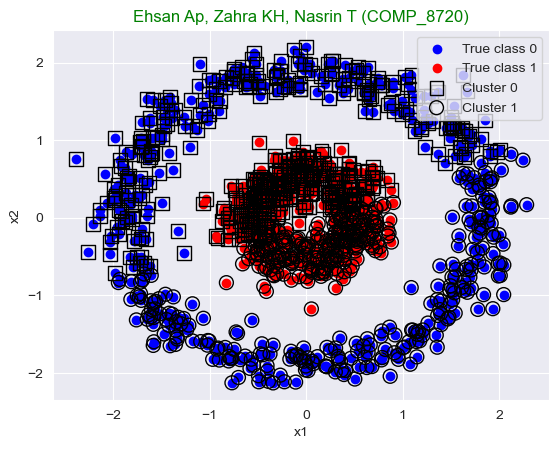

In [76]:
x_circle_col = circle_csv
x_circle_col = x_circle_col.drop('label', axis=1)
scaler_circle = preprocessing.StandardScaler()
scaler_circle.fit(X_circle)
scaled_X = scaler_circle.transform(X_circle)

xs = pd.DataFrame(scaled_X, columns=x_circle_col.columns)

from sklearn.mixture import GaussianMixture

gmm_circle = GaussianMixture(n_components=2)
gmm_y_circle = gmm_circle.fit_predict(xs)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(xs)
labels = gmm.predict(xs)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(list(set(labels)), cluster_markers):
    mask = labels == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [11]:
X = circle_csv[['x1', 'x2']].values
y = circle_csv['label'].values
gmm = GaussianMixture(n_components=2, random_state=42)
labels = gmm.fit_predict(X)
ari = adjusted_rand_score(circle_csv['label'], labels)
ami = adjusted_mutual_info_score(circle_csv['label'], labels)
sil = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)
ch_index = calinski_harabasz_score(X, labels)

print('Adjusted Rand Index (ARI):', ari)
print('Adjusted Mutual Information (AMI):', ami)
print('Silhouette Coefficient:', sil)
print('Davies Bouldin Score:', db_index)
print('Calinski Harabasz Score:', ch_index)

Adjusted Rand Index (ARI): -0.0009379238326585358
Adjusted Mutual Information (AMI): -0.0006767568369609996
Silhouette Coefficient: 0.2897742755054285
Davies Bouldin Score: 1.3162562490968568
Calinski Harabasz Score: 452.80917553162953


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

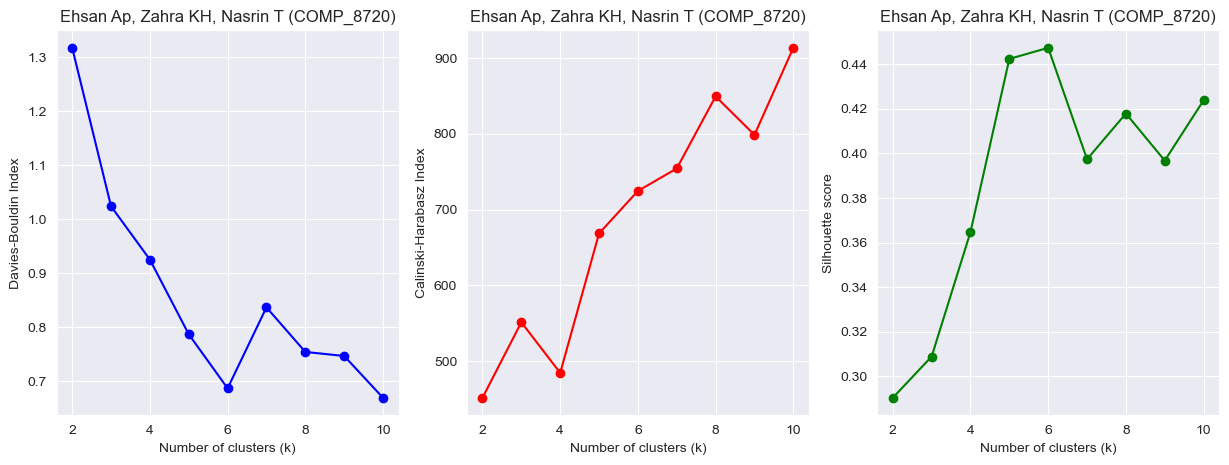

In [12]:
X = circle_csv[['x1', 'x2']].values

k_range = range(2, 11)

db_scores = []
ch_scores = []
sil_scores = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(X)
    labels = gmm.predict(X)

    db_score = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    sil_score = silhouette_score(X, labels)

    db_scores.append(db_score)
    ch_scores.append(ch_score)
    sil_scores.append(sil_score)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(k_range, db_scores, 'bo-')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Davies-Bouldin Index')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[1].plot(k_range, ch_scores, 'ro-')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[2].plot(k_range, sil_scores, 'go-')
ax[2].set_xlabel('Number of clusters (k)')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

plt.show()

# Spectural

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


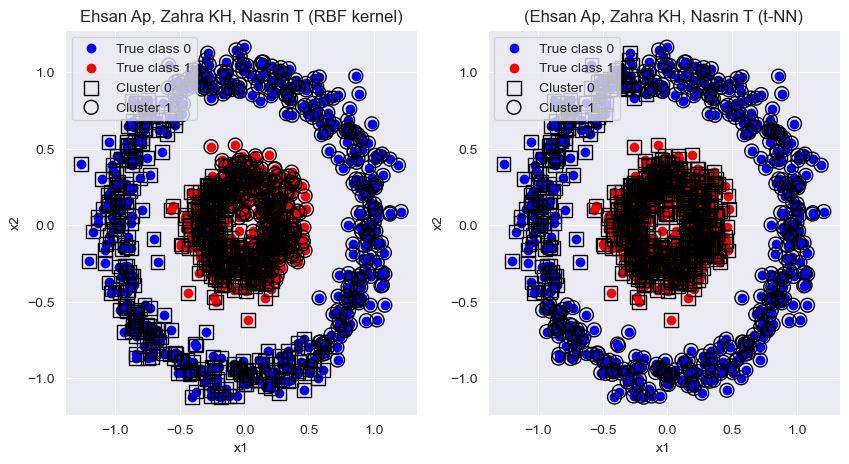

In [77]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)

sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels_tnn = sc_tnn.fit_predict(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_rbf).unique(), cluster_markers):
    mask = labels_rbf == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (RBF kernel)')
ax[0].legend()

for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_tnn).unique(), cluster_markers):
    mask = labels_tnn == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('(Ehsan Ap, Zahra KH, Nasrin T (t-NN)')
ax[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

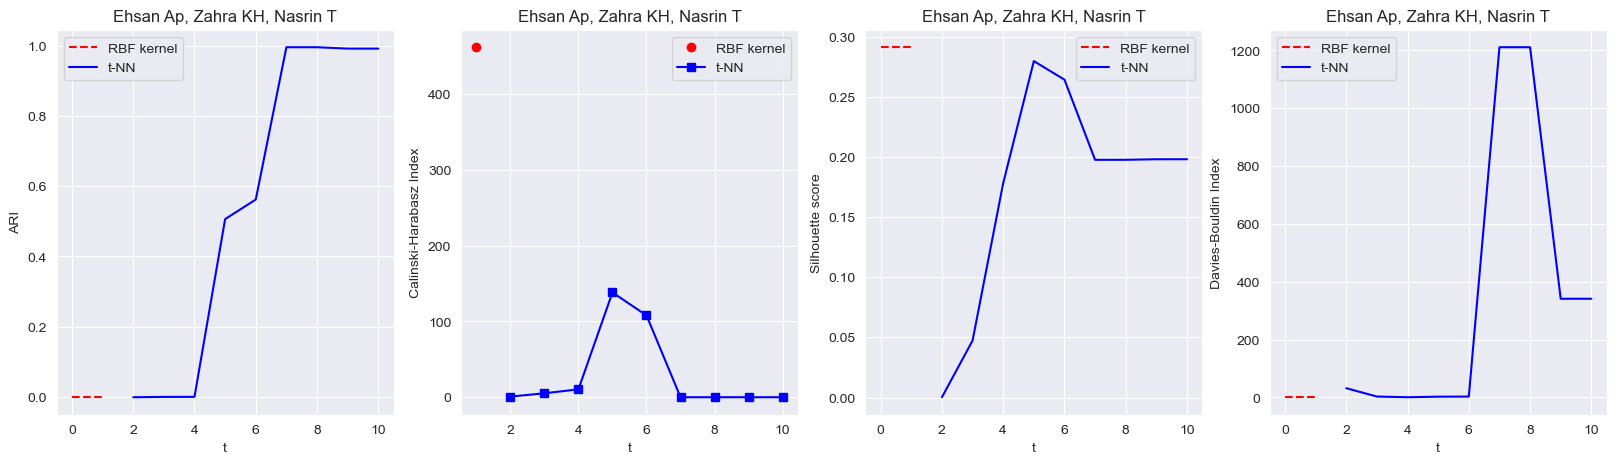

In [14]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ari_rbf = adjusted_rand_score(y_true, labels_rbf)
# ami_rbf = adjusted_mutual_info_score(y_true, labels_rbf)
sil_rbf = silhouette_score(X, labels_rbf)
db_rbf = davies_bouldin_score(X, labels_rbf)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ari_tnn = []
ami_tnn = []
sil_tnn = []
db_tnn = []
ch_tnn = []

for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ari_tnn.append(adjusted_rand_score(y_true, labels_tnn))
    # ami_tnn.append(adjusted_mutual_info_score(y_true, labels_tnn))
    db_tnn.append(davies_bouldin_score(X, labels_tnn))
    sil_tnn.append(silhouette_score(X, labels_tnn))
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot([0, 1], [ari_rbf, ari_rbf], 'r--', label='RBF kernel')
ax[0].plot(t_range, ari_tnn, 'b-', label='t-NN')
ax[0].set_xlabel('t')
ax[0].set_ylabel('ARI')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[0].legend()
ax[1].plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax[1].plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax[1].set_xlabel('t')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[1].legend()
ax[2].plot([0, 1], [sil_rbf, sil_rbf], 'r--', label='RBF kernel')
ax[2].plot(t_range, sil_tnn, 'b-', label='t-NN')
ax[2].set_xlabel('t')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[2].legend()
ax[3].plot([0, 1], [db_rbf, db_rbf], 'r--', label='RBF kernel')
ax[3].plot(t_range, db_tnn, 'b-', label='t-NN')
ax[3].set_xlabel('t')
ax[3].set_ylabel('Davies-Bouldin Index')
ax[3].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[3].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

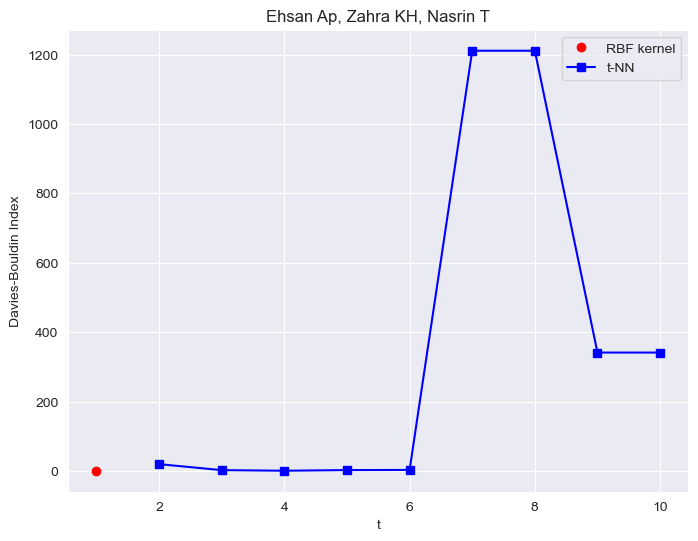

In [15]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

t_range = range(2, 11)

db_rbf = davies_bouldin_score(X, labels_rbf)

db_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    db_tnn.append(davies_bouldin_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [db_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, db_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Davies-Bouldin Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

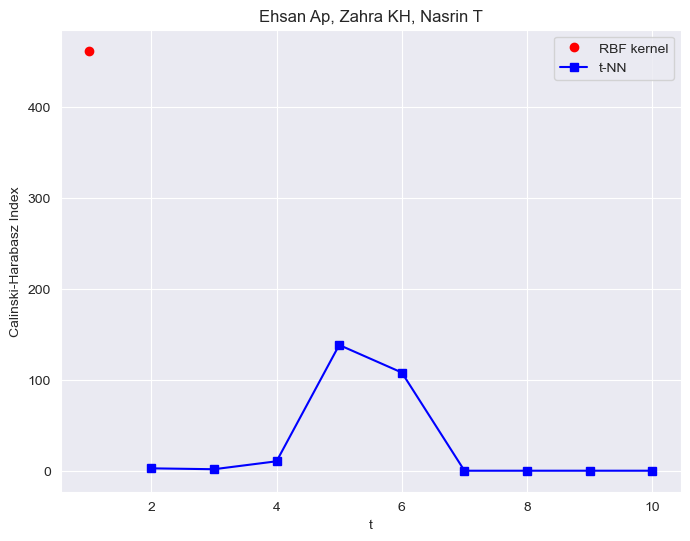

In [16]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ch_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Calinski-Harabasz Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()

# Moons

# K-means with Different Distance

In [18]:
# X = moons_csv[['x1', 'x2']]
#
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
#
#
# db_scores = []
# di_scores = []
# ch_scores = []
# i_scores = []
# xb_scores = []
#
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
#     db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
#     ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
#     distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
#     min_distances = np.min(distances, axis=1)
#     xb_scores.append(np.sum(min_distances**2) / (k * np.sum(distances**2)))
#     i_scores.append(silhouette_score(X, kmeans.labels_, sample_size=5, random_state=48))
#
#     distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
#     min_distances = np.min(distances, axis=1)
#     center_distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
#     intercluster_distances = np.max(center_distances)
#     intracluster_distances = np.min(min_distances)
#     di_scores.append(intercluster_distances / intracluster_distances)
#
#
# scores_table = pd.DataFrame({
#     'Number of Clusters': range(2, 11),
#     'Davies-Bouldin Index': db_scores,
#     'Dunn’s Index': di_scores,
#     'Calinski-Harabasz Index': ch_scores,
#     'Index I': i_scores,
#     'Xie-Beni Index': xb_scores
# })
#
# print(scores_table)

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

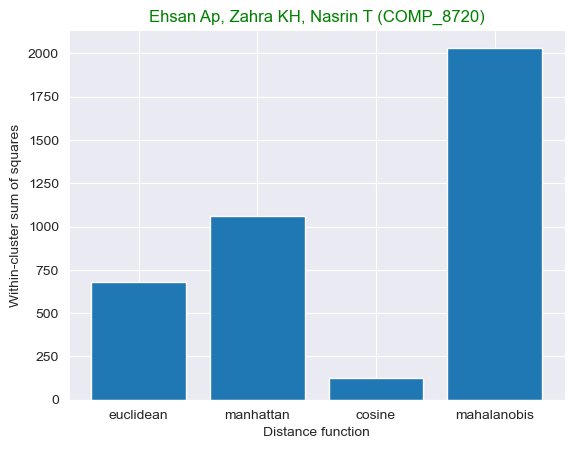

In [19]:
X = moons_csv[['x1', 'x2']].values
y = moons_csv['label'].values

distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

wss_values = []
for distance_function in distance_functions:
    if distance_function == 'manhattan':
        dists = pairwise_distances(X, metric='manhattan')
    else:
        dists = pairwise_distances(X, metric=distance_function)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    wss = sum(np.min(dists[:, kmeans.labels_], axis=1)**2)
    wss_values.append(wss)

fig, ax = plt.subplots()
ax.bar(distance_functions, wss_values)
ax.set_xlabel('Distance function')
ax.set_ylabel('Within-cluster sum of squares')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Kmeans with Different Distance Plot

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

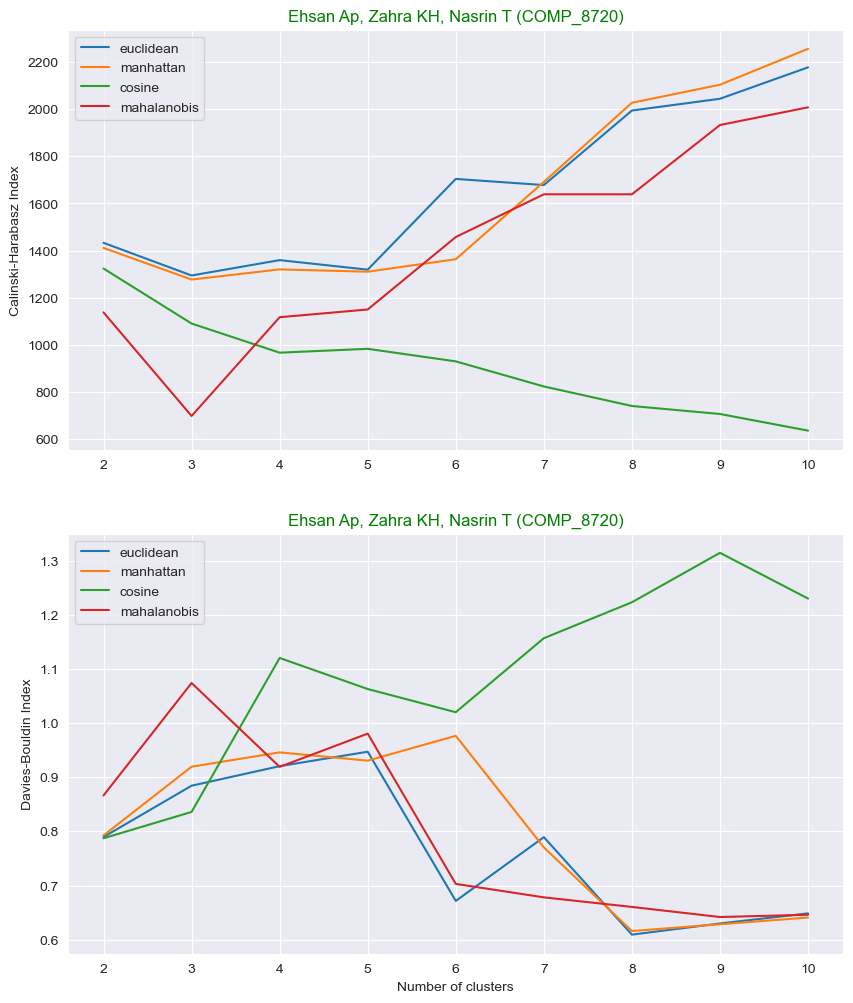

In [70]:
X = moons_csv[['x1', 'x2']].values
y = moons_csv['label'].values

n_clusters_range = range(2, 11)
distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

ch_scores = {}
# silhouette_scores = {}
db_scores = {}

for dist_func in distance_functions:
    ch_scores[dist_func] = []
    # silhouette_scores[dist_func] = []
    db_scores[dist_func] = []

    for n_clusters in n_clusters_range:
        if dist_func == 'mahalanobis':
            dist_matrix = pairwise_distances(X, metric=dist_func, VI=np.linalg.inv(np.cov(X.T)))
        else:
            dist_matrix = pairwise_distances(X, metric=dist_func)
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dist_matrix)

        ch_scores[dist_func].append(calinski_harabasz_score(X, kmeans.labels_))
        # silhouette_scores[dist_func].append(silhouette_score(X, kmeans.labels_))
        db_scores[dist_func].append(davies_bouldin_score(X, kmeans.labels_))

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
x = list(n_clusters_range)

for dist_func in distance_functions:
    axes[0].plot(x, ch_scores[dist_func], label=dist_func)
    # axes[1].plot(x, silhouette_scores[dist_func], label=dist_func)
    axes[1].plot(x, db_scores[dist_func], label=dist_func)

axes[0].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[0].set_ylabel("Calinski-Harabasz Index")
axes[0].legend()
# axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
# axes[1].set_ylabel("Silhouette score")
# axes[1].legend()
axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[1].set_xlabel("Number of clusters")
axes[1].set_ylabel("Davies-Bouldin Index")
axes[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


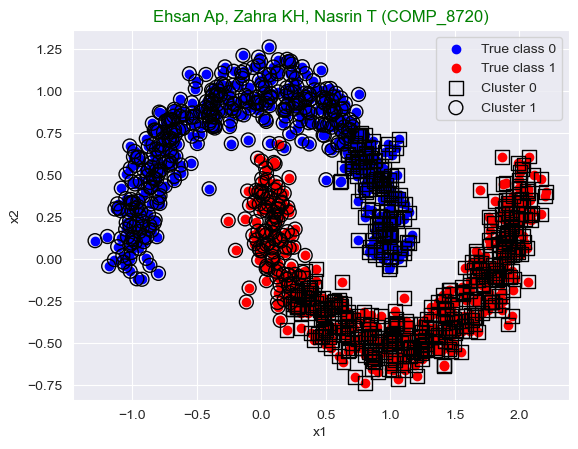

In [78]:
X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(set(kmeans.labels_), cluster_markers):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [22]:
# X = moons_csv[['x1', 'x2']]
# y_true = moons_csv['label']
#
# distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']
# true_colors = ['blue', 'red']
# cluster_markers = ['s', 'o', '^', 'x']
#
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
#
# for i, distance_func in enumerate(distance_functions):
#     if dist_func == 'mahalanobis':
#         dist_matrix = pairwise_distances(X, metric=dist_func, VI=np.linalg.inv(np.cov(X.T)))
#     else:
#         dist_matrix = pairwise_distances(X, metric=dist_func)
#     kmeans = KMeans(n_clusters=2, random_state=0).fit(dist_matrix)
#     kmeans.fit(X)
#     ax = axs[i // 2, i % 2]
#     for label, color in zip(y_true.unique(), true_colors):
#         mask = y_true == label
#         ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
#     for label, marker in zip(set(kmeans.labels_), cluster_markers):
#         mask = kmeans.labels_ == label
#         ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
#                    label=f'Cluster {label}')
#     ax.set_xlabel('x1')
#     ax.set_ylabel('x2')
#     ax.set_title(f'Clustering with {distance_func} distance')
#     ax.legend()
#
# plt.suptitle("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
# plt.tight_layout()
# plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

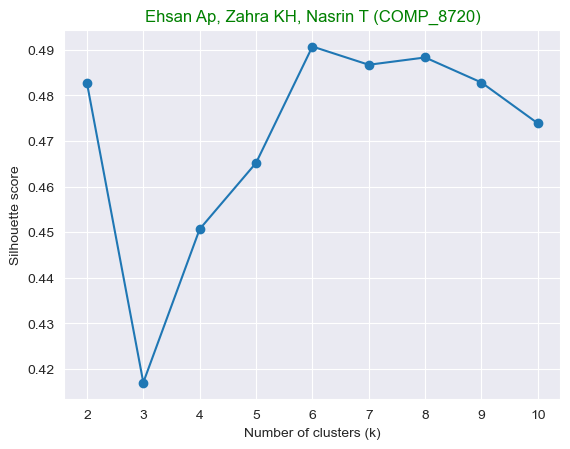

The best value of k is 6


In [23]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_moons)
    score = silhouette_score(X_moons, labels)
    silhouette_scores.append(score)

fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_scores, '-o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best value of k is {best_k}')

# EM

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


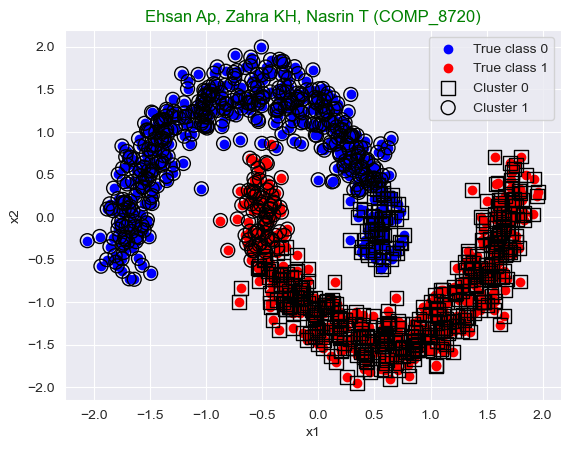

In [79]:
x_moons_col = moons_csv
x_moons_col = x_moons_col.drop('label', axis=1)
scaler_moons = preprocessing.StandardScaler()
scaler_moons.fit(X_moons)
scaled_X = scaler_moons.transform(X_moons)

xs = pd.DataFrame(scaled_X, columns=x_moons_col.columns)

from sklearn.mixture import GaussianMixture

gmm_moons = GaussianMixture(n_components=2)
gmm_y_moons = gmm_moons.fit_predict(xs)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(xs)
labels = gmm.predict(xs)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(list(set(labels)), cluster_markers):
    mask = labels == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [25]:
X = moons_csv[['x1', 'x2']].values
y = moons_csv['label'].values
gmm = GaussianMixture(n_components=2, random_state=42)
labels = gmm.fit_predict(X)
ari = adjusted_rand_score(moons_csv['label'], labels)
ami = adjusted_mutual_info_score(moons_csv['label'], labels)
sil = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)
ch_index = calinski_harabasz_score(X, labels)

print('Adjusted Rand Index (ARI):', ari)
print('Adjusted Mutual Information (AMI):', ami)
print('Silhouette Coefficient:', sil)
print('Davies Bouldin Score:', db_index)
print('Calinski Harabasz Score:', ch_index)

Adjusted Rand Index (ARI): 0.4838993910396891
Adjusted Mutual Information (AMI): 0.38474582852239225
Silhouette Coefficient: 0.4634385710197224
Davies Bouldin Score: 0.8307695473917315
Calinski Harabasz Score: 1251.821605995674


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

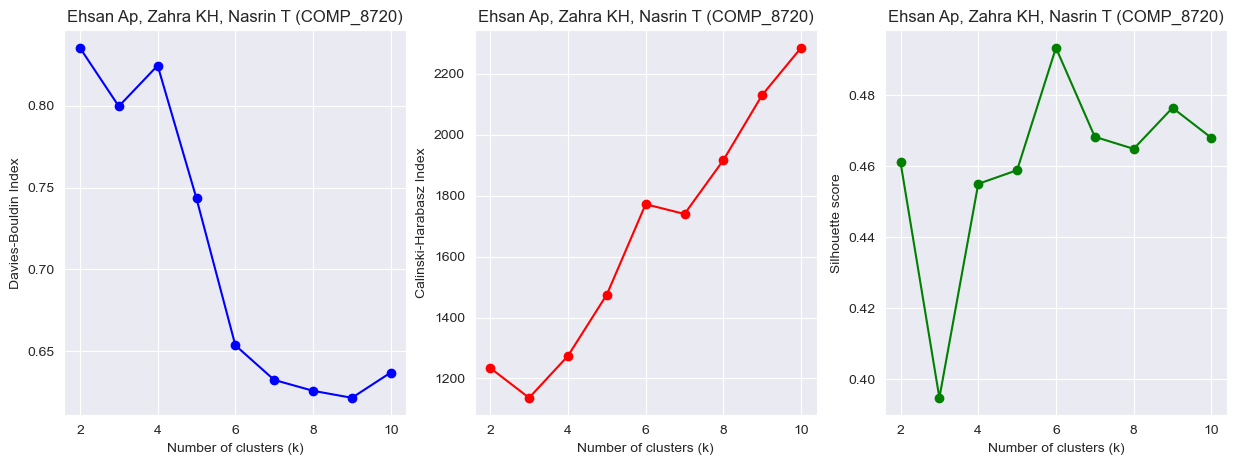

In [26]:
X = moons_csv[['x1', 'x2']].values

k_range = range(2, 11)

db_scores = []
ch_scores = []
sil_scores = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(X)
    labels = gmm.predict(X)

    db_score = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    sil_score = silhouette_score(X, labels)

    db_scores.append(db_score)
    ch_scores.append(ch_score)
    sil_scores.append(sil_score)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(k_range, db_scores, 'bo-')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Davies-Bouldin Index')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[1].plot(k_range, ch_scores, 'ro-')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[2].plot(k_range, sil_scores, 'go-')
ax[2].set_xlabel('Number of clusters (k)')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

plt.show()

# Spectural

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


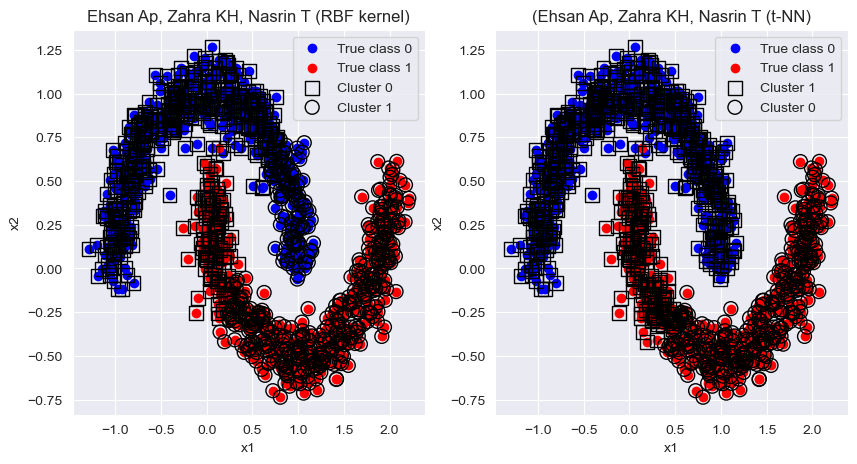

In [80]:
X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)

sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels_tnn = sc_tnn.fit_predict(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_rbf).unique(), cluster_markers):
    mask = labels_rbf == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (RBF kernel)')
ax[0].legend()

for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_tnn).unique(), cluster_markers):
    mask = labels_tnn == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('(Ehsan Ap, Zahra KH, Nasrin T (t-NN)')
ax[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

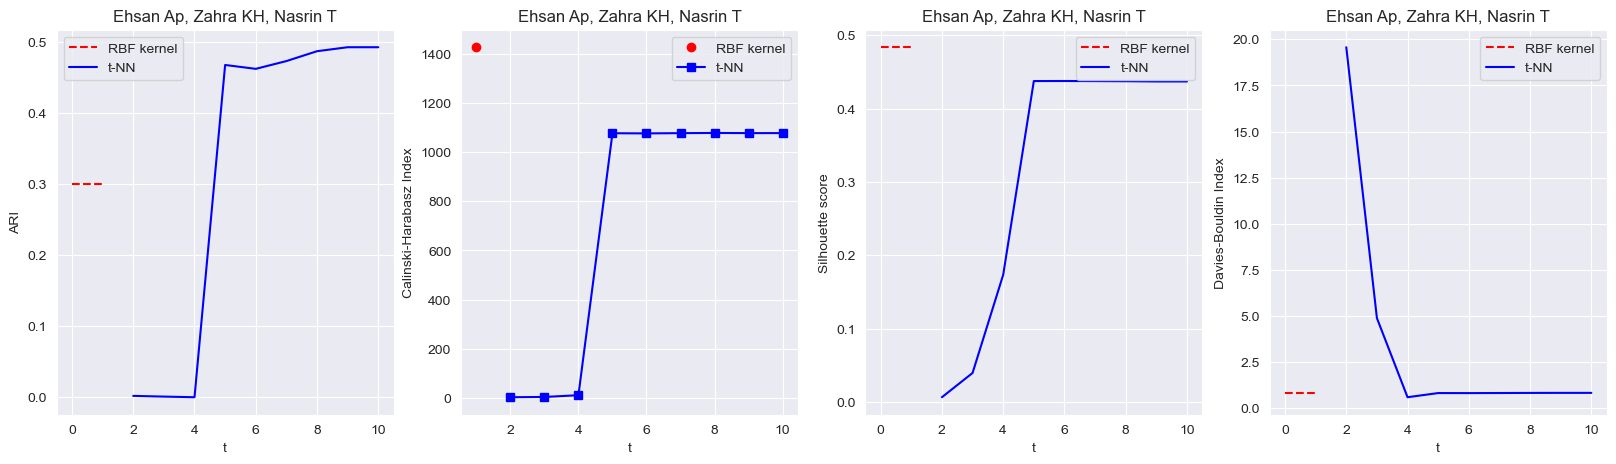

In [28]:
X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ari_rbf = adjusted_rand_score(y_true, labels_rbf)
# ami_rbf = adjusted_mutual_info_score(y_true, labels_rbf)
sil_rbf = silhouette_score(X, labels_rbf)
db_rbf = davies_bouldin_score(X, labels_rbf)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ari_tnn = []
ami_tnn = []
sil_tnn = []
db_tnn = []
ch_tnn = []

for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ari_tnn.append(adjusted_rand_score(y_true, labels_tnn))
    # ami_tnn.append(adjusted_mutual_info_score(y_true, labels_tnn))
    db_tnn.append(davies_bouldin_score(X, labels_tnn))
    sil_tnn.append(silhouette_score(X, labels_tnn))
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot([0, 1], [ari_rbf, ari_rbf], 'r--', label='RBF kernel')
ax[0].plot(t_range, ari_tnn, 'b-', label='t-NN')
ax[0].set_xlabel('t')
ax[0].set_ylabel('ARI')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[0].legend()
ax[1].plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax[1].plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax[1].set_xlabel('t')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[1].legend()
ax[2].plot([0, 1], [sil_rbf, sil_rbf], 'r--', label='RBF kernel')
ax[2].plot(t_range, sil_tnn, 'b-', label='t-NN')
ax[2].set_xlabel('t')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[2].legend()
ax[3].plot([0, 1], [db_rbf, db_rbf], 'r--', label='RBF kernel')
ax[3].plot(t_range, db_tnn, 'b-', label='t-NN')
ax[3].set_xlabel('t')
ax[3].set_ylabel('Davies-Bouldin Index')
ax[3].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[3].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

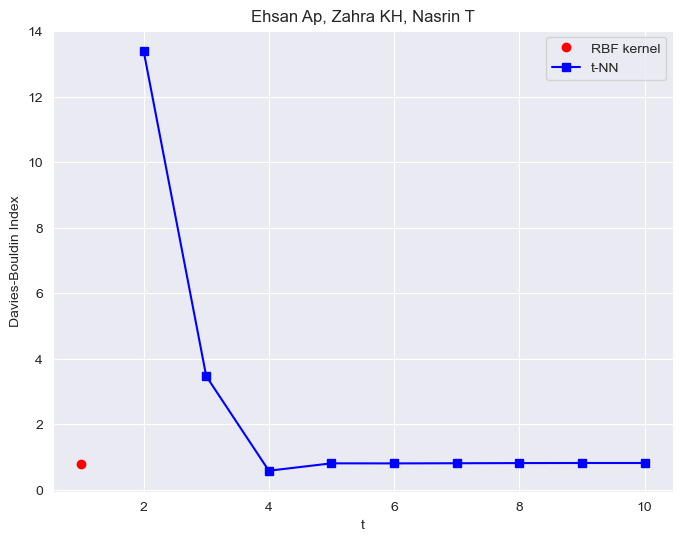

In [29]:
X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

t_range = range(2, 11)

db_rbf = davies_bouldin_score(X, labels_rbf)

db_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    db_tnn.append(davies_bouldin_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [db_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, db_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Davies-Bouldin Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

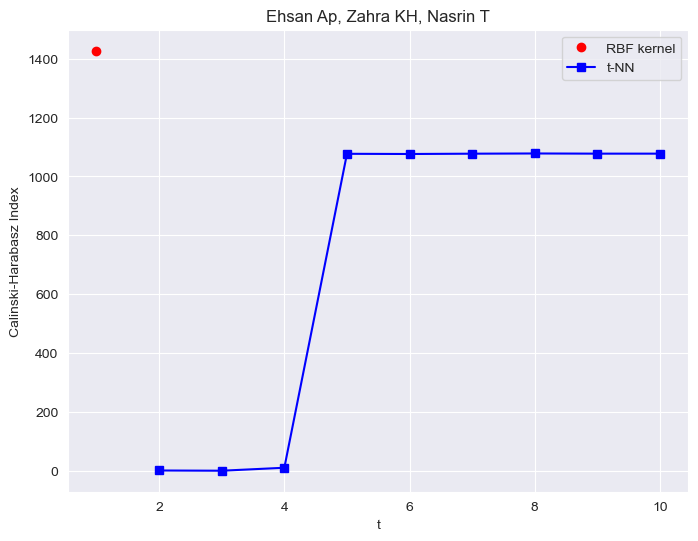

In [30]:
X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ch_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Calinski-Harabasz Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()

# Spiral

# K-means with Different Distance

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

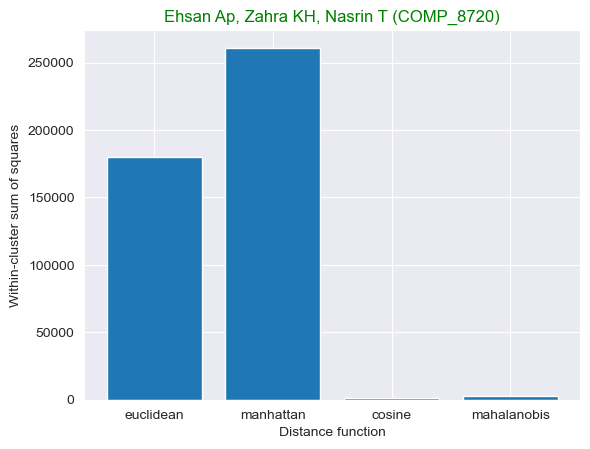

In [31]:
X = spiral_csv[['x', 'y']].values
y = spiral_csv['label'].values

distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

wss_values = []
for distance_function in distance_functions:
    if distance_function == 'manhattan':
        dists = pairwise_distances(X, metric='manhattan')
    else:
        dists = pairwise_distances(X, metric=distance_function)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    wss = sum(np.min(dists[:, kmeans.labels_], axis=1)**2)
    wss_values.append(wss)

fig, ax = plt.subplots()
ax.bar(distance_functions, wss_values)
ax.set_xlabel('Distance function')
ax.set_ylabel('Within-cluster sum of squares')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Kmeans with Different Distance Plot

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

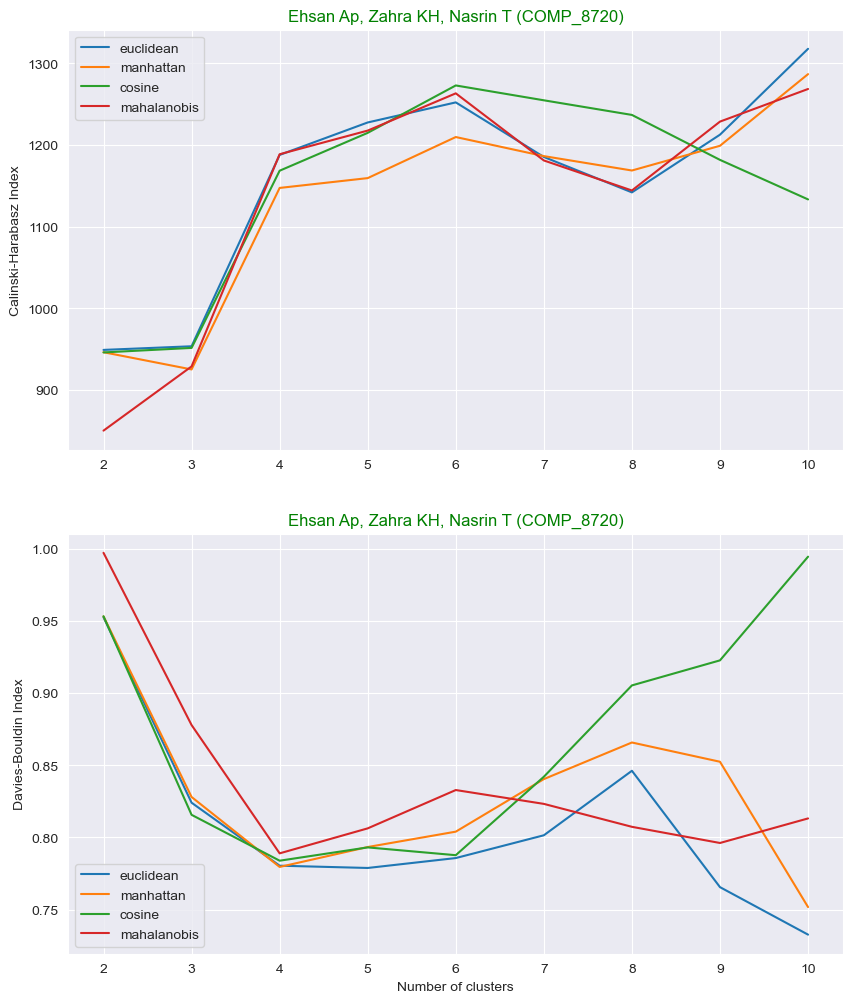

In [71]:
X = spiral_csv[['x', 'y']].values
y = spiral_csv['label'].values

n_clusters_range = range(2, 11)
distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

ch_scores = {}
# silhouette_scores = {}
db_scores = {}

for dist_func in distance_functions:
    ch_scores[dist_func] = []
    # silhouette_scores[dist_func] = []
    db_scores[dist_func] = []

    for n_clusters in n_clusters_range:
        if dist_func == 'mahalanobis':
            dist_matrix = pairwise_distances(X, metric=dist_func, VI=np.linalg.inv(np.cov(X.T)))
        else:
            dist_matrix = pairwise_distances(X, metric=dist_func)
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dist_matrix)

        ch_scores[dist_func].append(calinski_harabasz_score(X, kmeans.labels_))
        # silhouette_scores[dist_func].append(silhouette_score(X, kmeans.labels_))
        db_scores[dist_func].append(davies_bouldin_score(X, kmeans.labels_))

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
x = list(n_clusters_range)

for dist_func in distance_functions:
    axes[0].plot(x, ch_scores[dist_func], label=dist_func)
    # axes[1].plot(x, silhouette_scores[dist_func], label=dist_func)
    axes[1].plot(x, db_scores[dist_func], label=dist_func)

axes[0].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[0].set_ylabel("Calinski-Harabasz Index")
axes[0].legend()
# axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
# axes[1].set_ylabel("Silhouette score")
# axes[1].legend()
axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[1].set_xlabel("Number of clusters")
axes[1].set_ylabel("Davies-Bouldin Index")
axes[1].legend()
plt.show()

In [33]:
X = spiral_csv[['x', 'y']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

db_scores = []
di_scores = []
ch_scores = []
i_scores = []
xb_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    xb_scores.append(np.sum(min_distances**2) / (k * np.sum(distances**2)))
    i_scores.append(silhouette_score(X, kmeans.labels_, sample_size=5, random_state=48))

    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    center_distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
    intercluster_distances = np.max(center_distances)
    intracluster_distances = np.min(min_distances)
    di_scores.append(intercluster_distances / intracluster_distances)


scores_table = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Davies-Bouldin Index': db_scores,
    'Dunn’s Index': di_scores,
    'Calinski-Harabasz Index': ch_scores,
    'Index I': i_scores,
    'Xie-Beni Index': xb_scores
})

print(scores_table)

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

   Number of Clusters  Davies-Bouldin Index  Dunn’s Index  \
0                   2              0.949054     47.334568   
1                   3              0.838611     55.717990   
2                   4              0.790100     95.108701   
3                   5              0.784989     58.209607   
4                   6              0.803370    100.033576   
5                   7              0.818584     73.492390   
6                   8              0.851613    265.919438   
7                   9              0.765325    227.775139   
8                  10              0.721971    457.454204   

   Calinski-Harabasz Index   Index I  Xie-Beni Index  
0               948.667747  0.574178        0.085686  
1               984.349459  0.430135        0.022446  
2              1213.377735  0.430135        0.007539  
3              1250.503696  0.055281        0.003632  
4              1314.191521  0.055281        0.001969  
5              1298.445028 -0.079545        0.001227  
6   

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


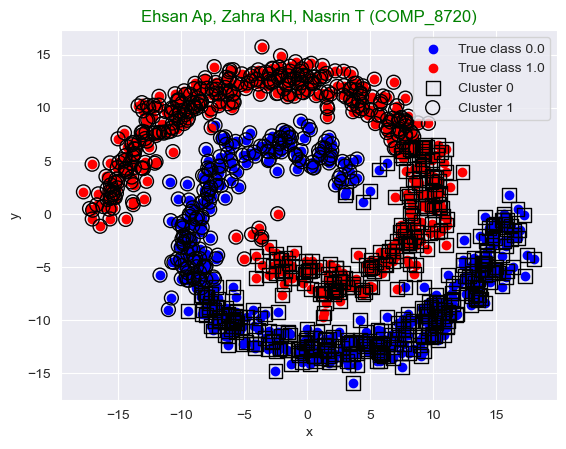

In [81]:
X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker in zip(set(kmeans.labels_), cluster_markers):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

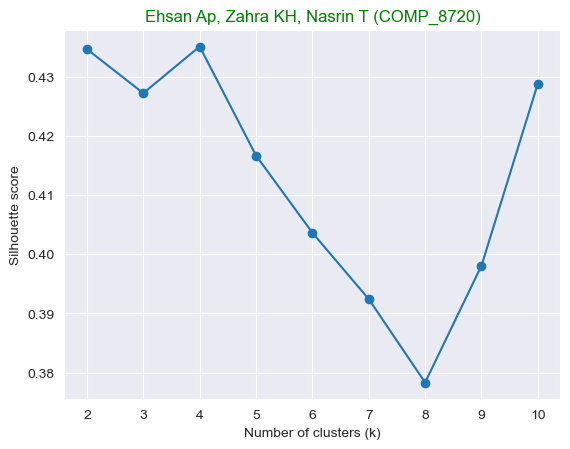

The best value of k is 4


In [35]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_spiral)
    score = silhouette_score(X_spiral, labels)
    silhouette_scores.append(score)

fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_scores, '-o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best value of k is {best_k}')

# EM

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


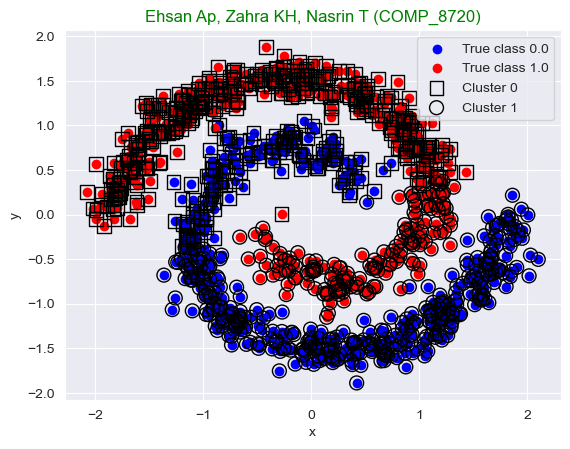

In [82]:
x_spiral_col = spiral_csv
x_spiral_col = x_spiral_col.drop('label', axis=1)
scaler_spiral = preprocessing.StandardScaler()
scaler_spiral.fit(X_spiral)
scaled_X = scaler_spiral.transform(X_spiral)

xs = pd.DataFrame(scaled_X, columns=x_spiral_col.columns)

from sklearn.mixture import GaussianMixture

gmm_spiral = GaussianMixture(n_components=2)
gmm_y_spiral = gmm_spiral.fit_predict(xs)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(xs)
labels = gmm.predict(xs)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(xs[mask]['x'], xs[mask]['y'], c=color, label=f'True class {label}')
for label, marker in zip(list(set(labels)), cluster_markers):
    mask = labels == label
    ax.scatter(xs[mask]['x'], xs[mask]['y'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [37]:
X = spiral_csv[['x', 'y']].values
y = spiral_csv['label'].values
gmm = GaussianMixture(n_components=2, random_state=42)
labels = gmm.fit_predict(X)
ari = adjusted_rand_score(spiral_csv['label'], labels)
ami = adjusted_mutual_info_score(spiral_csv['label'], labels)
sil = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)
ch_index = calinski_harabasz_score(X, labels)

print('Adjusted Rand Index (ARI):', ari)
print('Adjusted Mutual Information (AMI):', ami)
print('Silhouette Coefficient:', sil)
print('Davies Bouldin Score:', db_index)
print('Calinski Harabasz Score:', ch_index)

Adjusted Rand Index (ARI): 0.17389709993958358
Adjusted Mutual Information (AMI): 0.1293686950257301
Silhouette Coefficient: 0.42961352994811947
Davies Bouldin Score: 0.9785221634522157
Calinski Harabasz Score: 888.1435032677558


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

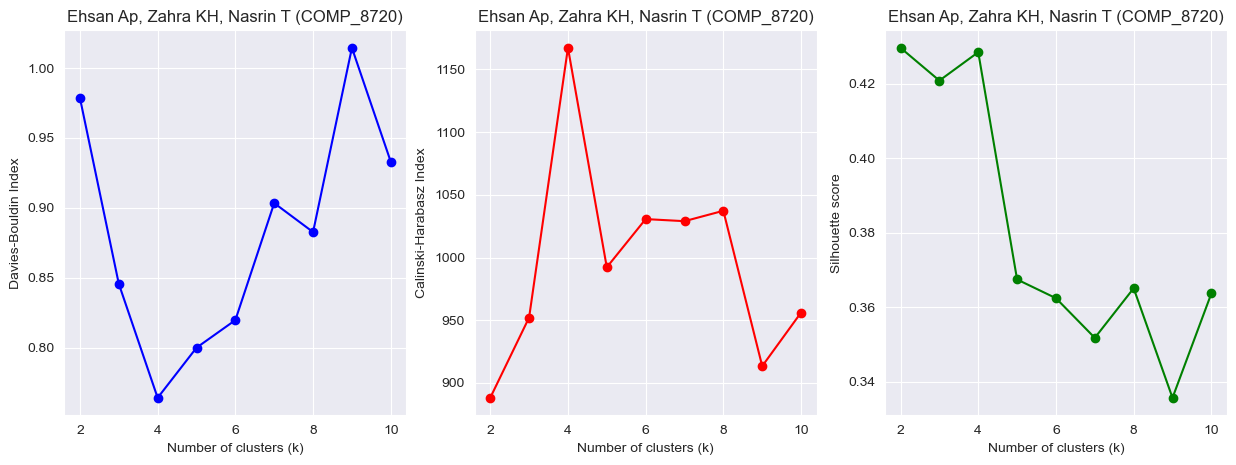

In [38]:
X = spiral_csv[['x', 'y']].values

k_range = range(2, 11)

db_scores = []
ch_scores = []
sil_scores = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(X)
    labels = gmm.predict(X)

    db_score = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    sil_score = silhouette_score(X, labels)

    db_scores.append(db_score)
    ch_scores.append(ch_score)
    sil_scores.append(sil_score)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(k_range, db_scores, 'bo-')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Davies-Bouldin Index')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[1].plot(k_range, ch_scores, 'ro-')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[2].plot(k_range, sil_scores, 'go-')
ax[2].set_xlabel('Number of clusters (k)')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

plt.show()

# Spectural

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


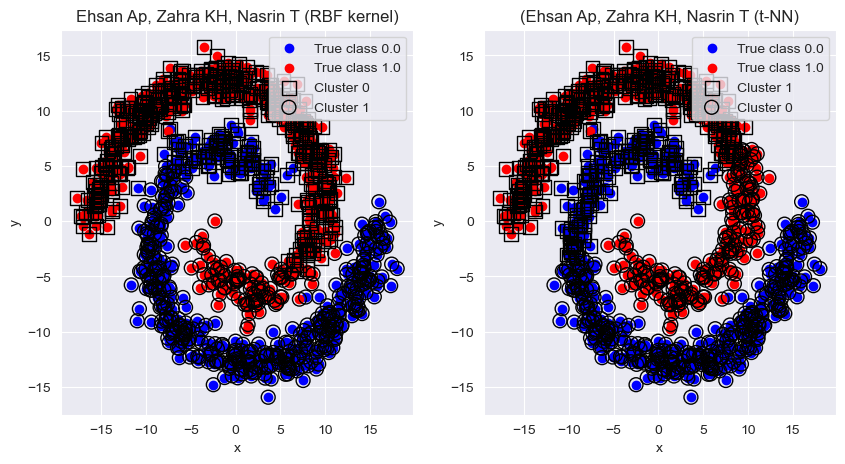

In [83]:
X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)

sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels_tnn = sc_tnn.fit_predict(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[0].scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_rbf).unique(), cluster_markers):
    mask = labels_rbf == label
    ax[0].scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (RBF kernel)')
ax[0].legend()

for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[1].scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_tnn).unique(), cluster_markers):
    mask = labels_tnn == label
    ax[1].scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('(Ehsan Ap, Zahra KH, Nasrin T (t-NN)')
ax[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

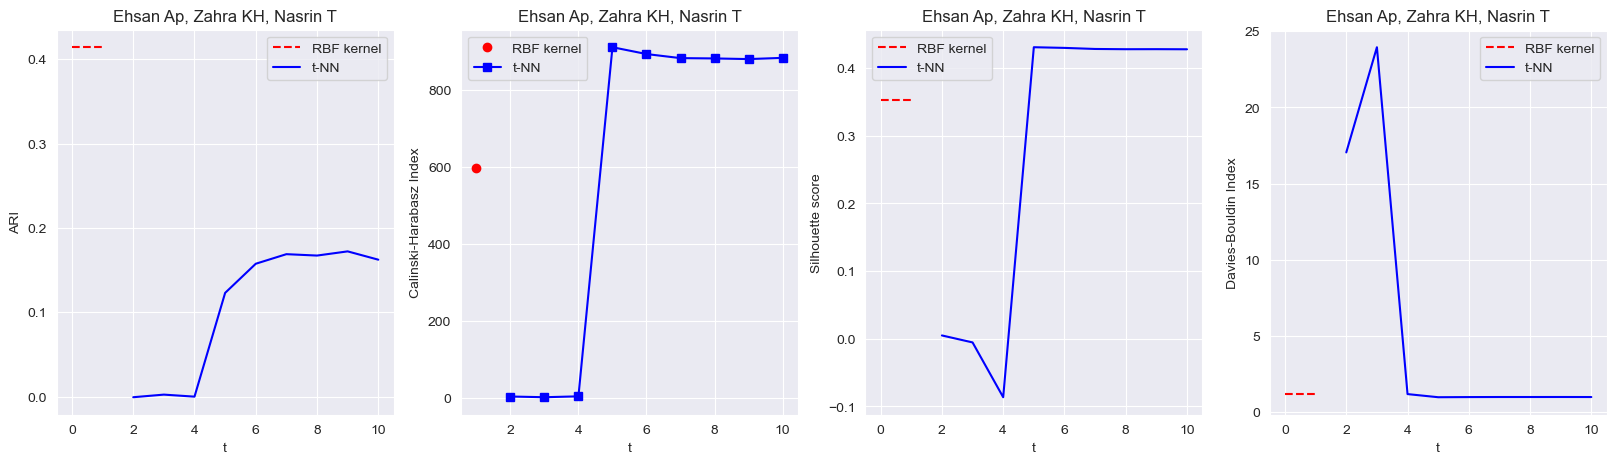

In [40]:
X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ari_rbf = adjusted_rand_score(y_true, labels_rbf)
# ami_rbf = adjusted_mutual_info_score(y_true, labels_rbf)
sil_rbf = silhouette_score(X, labels_rbf)
db_rbf = davies_bouldin_score(X, labels_rbf)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ari_tnn = []
ami_tnn = []
sil_tnn = []
db_tnn = []
ch_tnn = []

for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ari_tnn.append(adjusted_rand_score(y_true, labels_tnn))
    # ami_tnn.append(adjusted_mutual_info_score(y_true, labels_tnn))
    db_tnn.append(davies_bouldin_score(X, labels_tnn))
    sil_tnn.append(silhouette_score(X, labels_tnn))
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot([0, 1], [ari_rbf, ari_rbf], 'r--', label='RBF kernel')
ax[0].plot(t_range, ari_tnn, 'b-', label='t-NN')
ax[0].set_xlabel('t')
ax[0].set_ylabel('ARI')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[0].legend()
ax[1].plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax[1].plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax[1].set_xlabel('t')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[1].legend()
ax[2].plot([0, 1], [sil_rbf, sil_rbf], 'r--', label='RBF kernel')
ax[2].plot(t_range, sil_tnn, 'b-', label='t-NN')
ax[2].set_xlabel('t')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[2].legend()
ax[3].plot([0, 1], [db_rbf, db_rbf], 'r--', label='RBF kernel')
ax[3].plot(t_range, db_tnn, 'b-', label='t-NN')
ax[3].set_xlabel('t')
ax[3].set_ylabel('Davies-Bouldin Index')
ax[3].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[3].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

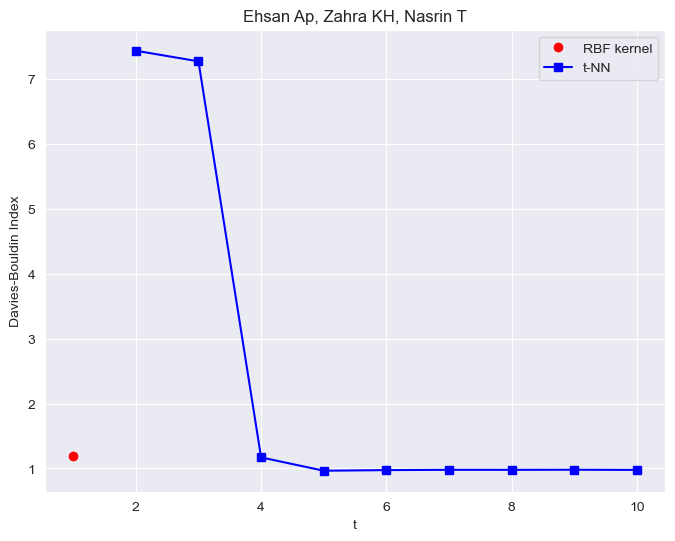

In [41]:
X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

t_range = range(2, 11)

db_rbf = davies_bouldin_score(X, labels_rbf)

db_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    db_tnn.append(davies_bouldin_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [db_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, db_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Davies-Bouldin Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

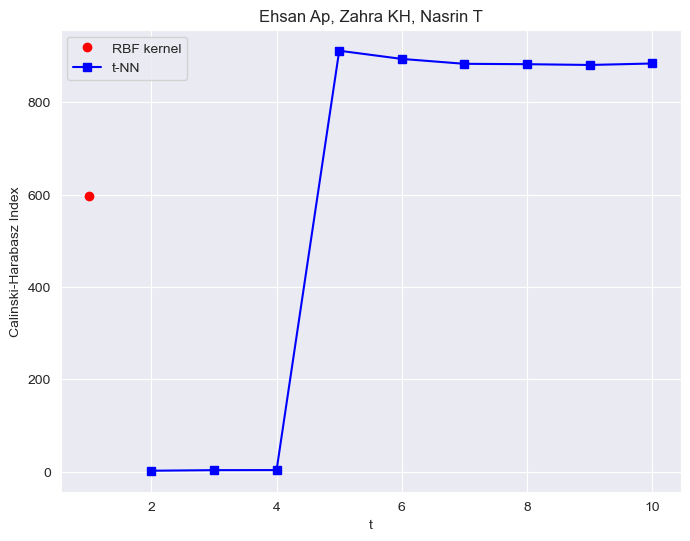

In [42]:
X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ch_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Calinski-Harabasz Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()

# Twogaussians42

# K-means with Different Distance

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

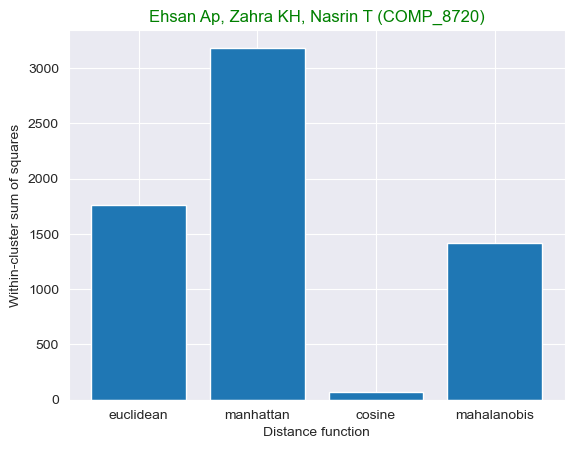

In [43]:
X = twogaussians42_csv[['x1', 'x2']].values
y = twogaussians42_csv['label'].values

distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

wss_values = []
for distance_function in distance_functions:
    if distance_function == 'manhattan':
        dists = pairwise_distances(X, metric='manhattan')
    else:
        dists = pairwise_distances(X, metric=distance_function)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    wss = sum(np.min(dists[:, kmeans.labels_], axis=1)**2)
    wss_values.append(wss)

fig, ax = plt.subplots()
ax.bar(distance_functions, wss_values)
ax.set_xlabel('Distance function')
ax.set_ylabel('Within-cluster sum of squares')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Kmeans with Different Distance Plot

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

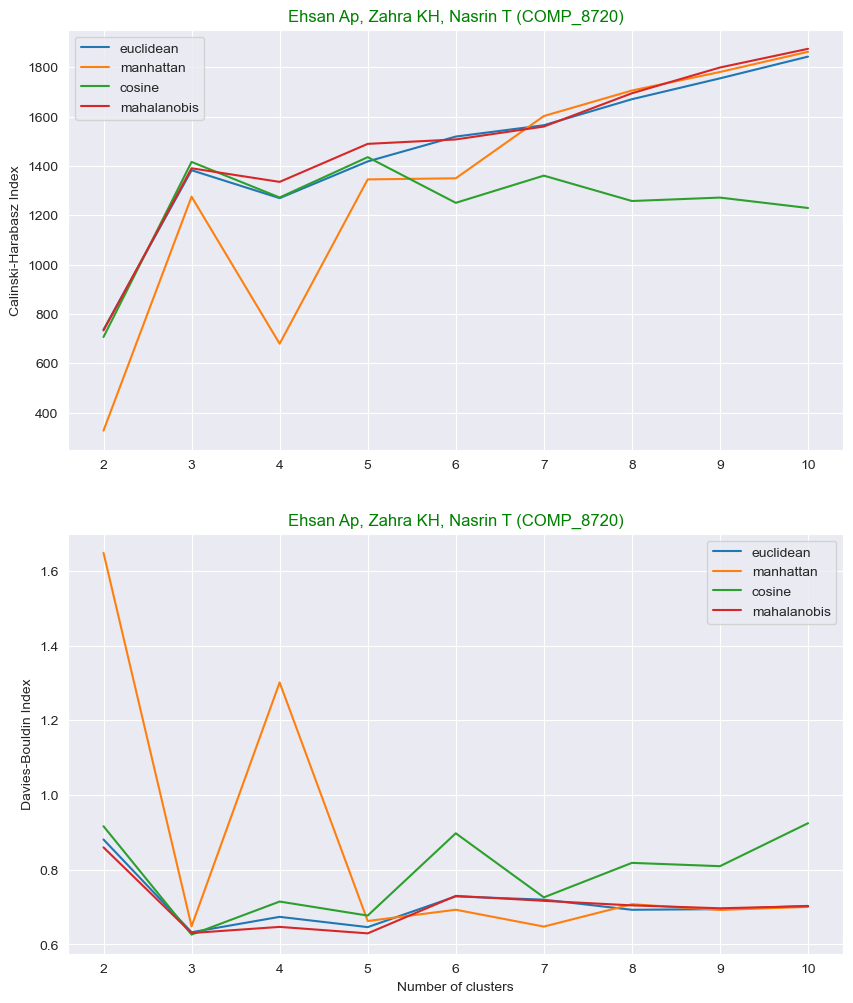

In [72]:
X = twogaussians42_csv[['x1', 'x2']].values
y = twogaussians42_csv['label'].values

n_clusters_range = range(2, 11)
distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

ch_scores = {}
# silhouette_scores = {}
db_scores = {}

for dist_func in distance_functions:
    ch_scores[dist_func] = []
    # silhouette_scores[dist_func] = []
    db_scores[dist_func] = []

    for n_clusters in n_clusters_range:
        if dist_func == 'mahalanobis':
            dist_matrix = pairwise_distances(X, metric=dist_func, VI=np.linalg.inv(np.cov(X.T)))
        else:
            dist_matrix = pairwise_distances(X, metric=dist_func)
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dist_matrix)

        ch_scores[dist_func].append(calinski_harabasz_score(X, kmeans.labels_))
        # silhouette_scores[dist_func].append(silhouette_score(X, kmeans.labels_))
        db_scores[dist_func].append(davies_bouldin_score(X, kmeans.labels_))

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
x = list(n_clusters_range)

for dist_func in distance_functions:
    axes[0].plot(x, ch_scores[dist_func], label=dist_func)
    # axes[1].plot(x, silhouette_scores[dist_func], label=dist_func)
    axes[1].plot(x, db_scores[dist_func], label=dist_func)

axes[0].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[0].set_ylabel("Calinski-Harabasz Index")
axes[0].legend()
# axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
# axes[1].set_ylabel("Silhouette score")
# axes[1].legend()
axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[1].set_xlabel("Number of clusters")
axes[1].set_ylabel("Davies-Bouldin Index")
axes[1].legend()
plt.show()

In [45]:
X = twogaussians42_csv[['x1', 'x2']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

db_scores = []
di_scores = []
ch_scores = []
i_scores = []
xb_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    xb_scores.append(np.sum(min_distances**2) / (k * np.sum(distances**2)))
    i_scores.append(silhouette_score(X, kmeans.labels_, random_state=48))

    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    center_distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
    intercluster_distances = np.max(center_distances)
    intracluster_distances = np.min(min_distances)
    di_scores.append(intercluster_distances / intracluster_distances)


scores_table = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Davies-Bouldin Index': db_scores,
    'Dunn’s Index': di_scores,
    'Calinski-Harabasz Index': ch_scores,
    'Index I': i_scores,
    'Xie-Beni Index': xb_scores
})

print(scores_table)

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

   Number of Clusters  Davies-Bouldin Index  Dunn’s Index  \
0                   2              0.876726    265.341017   
1                   3              0.624886    119.190923   
2                   4              0.648072    235.238637   
3                   5              0.643976    306.667002   
4                   6              0.724254    281.878634   
5                   7              0.657794    543.138258   
6                   8              0.703567    301.032537   
7                   9              0.696071    283.695065   
8                  10              0.673227    324.731832   

   Calinski-Harabasz Index   Index I  Xie-Beni Index  
0               707.796266  0.437177        0.098852  
1              1428.935283  0.525189        0.017006  
2              1370.577142  0.489866        0.006686  
3              1571.459737  0.476317        0.002909  
4              1553.341739  0.432881        0.001497  
5              1645.081620  0.440449        0.000874  
6   

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


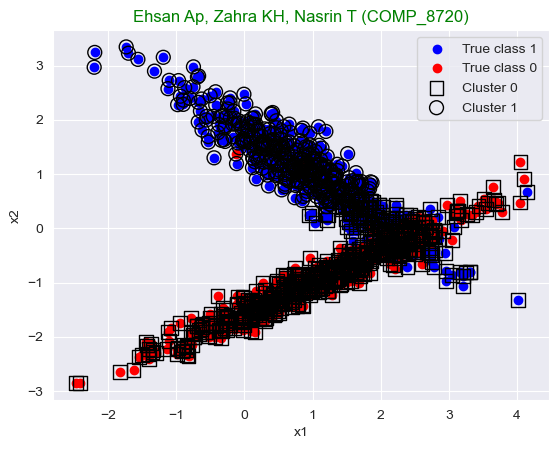

In [84]:
X = twogaussians42_csv[['x1', 'x2']]
y_true = twogaussians42_csv['label']

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(set(kmeans.labels_), cluster_markers):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

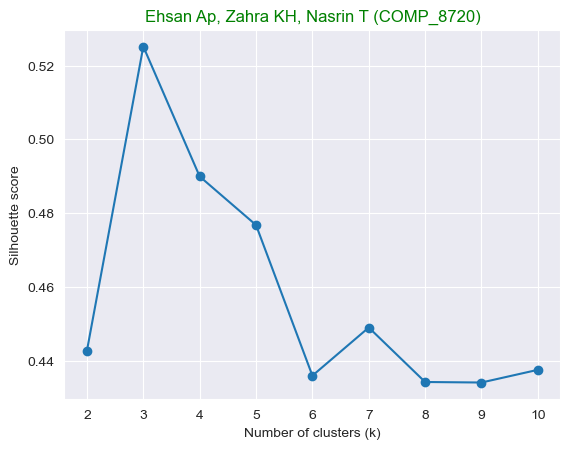

The best value of k is 3


In [47]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_twogaussians42)
    score = silhouette_score(X_twogaussians42, labels)
    silhouette_scores.append(score)

fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_scores, '-o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best value of k is {best_k}')

# EM

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


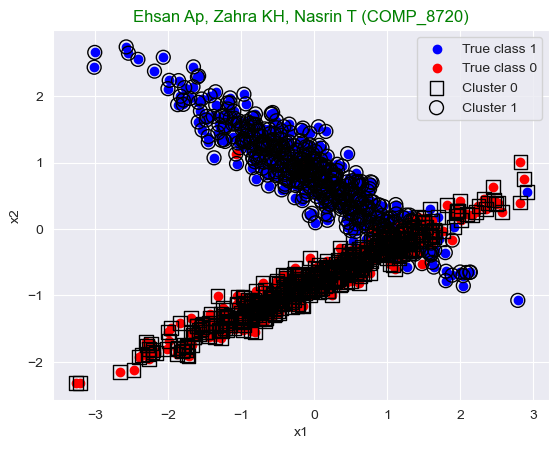

In [85]:
x_twogaussians42_col = twogaussians42_csv
x_twogaussians42_col = x_twogaussians42_col.drop('label', axis=1)
scaler_twogaussians42 = preprocessing.StandardScaler()
scaler_twogaussians42.fit(X_twogaussians42)
scaled_X = scaler_twogaussians42.transform(X_twogaussians42)

xs = pd.DataFrame(scaled_X, columns=x_twogaussians42_col.columns)

from sklearn.mixture import GaussianMixture

gmm_twogaussians42 = GaussianMixture(n_components=2)
gmm_y_twogaussians42 = gmm_twogaussians42.fit_predict(xs)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(xs)
labels = gmm.predict(xs)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(list(set(labels)), cluster_markers):
    mask = labels == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [49]:
X = twogaussians42_csv[['x1', 'x2']].values
y = twogaussians42_csv['label'].values
gmm = GaussianMixture(n_components=2, random_state=42)
labels = gmm.fit_predict(X)
ari = adjusted_rand_score(twogaussians42_csv['label'], labels)
ami = adjusted_mutual_info_score(twogaussians42_csv['label'], labels)
sil = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)
ch_index = calinski_harabasz_score(X, labels)

print('Adjusted Rand Index (ARI):', ari)
print('Adjusted Mutual Information (AMI):', ami)
print('Silhouette Coefficient:', sil)
print('Davies Bouldin Score:', db_index)
print('Calinski Harabasz Score:', ch_index)

Adjusted Rand Index (ARI): 0.8098098940849051
Adjusted Mutual Information (AMI): 0.7178140675210792
Silhouette Coefficient: 0.3798754365118318
Davies Bouldin Score: 1.0799076168218864
Calinski Harabasz Score: 564.0789660929155


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

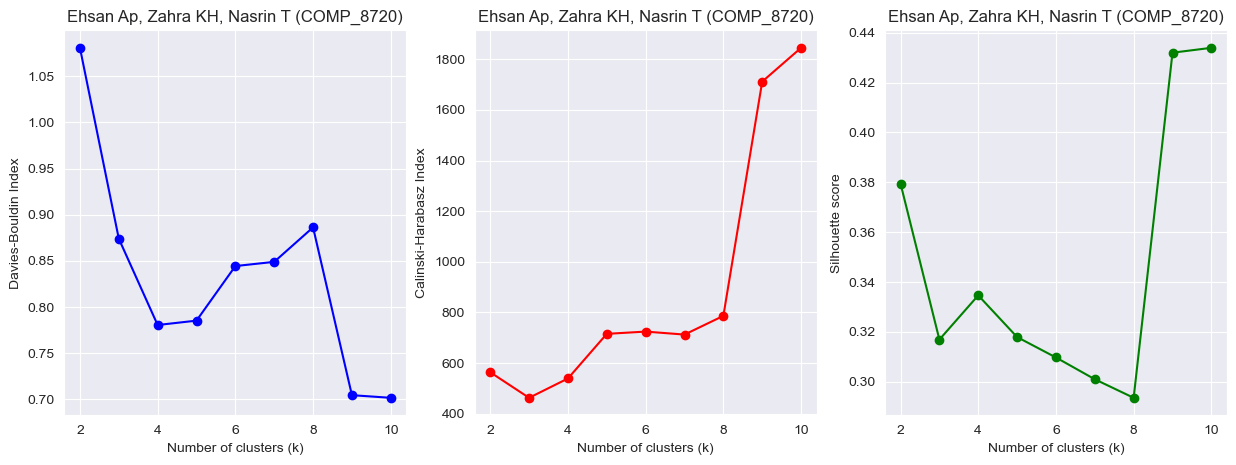

In [50]:
X = twogaussians42_csv[['x1', 'x2']].values

k_range = range(2, 11)

db_scores = []
ch_scores = []
sil_scores = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(X)
    labels = gmm.predict(X)

    db_score = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    sil_score = silhouette_score(X, labels)

    db_scores.append(db_score)
    ch_scores.append(ch_score)
    sil_scores.append(sil_score)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(k_range, db_scores, 'bo-')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Davies-Bouldin Index')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[1].plot(k_range, ch_scores, 'ro-')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[2].plot(k_range, sil_scores, 'go-')
ax[2].set_xlabel('Number of clusters (k)')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

plt.show()

# Spectural

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


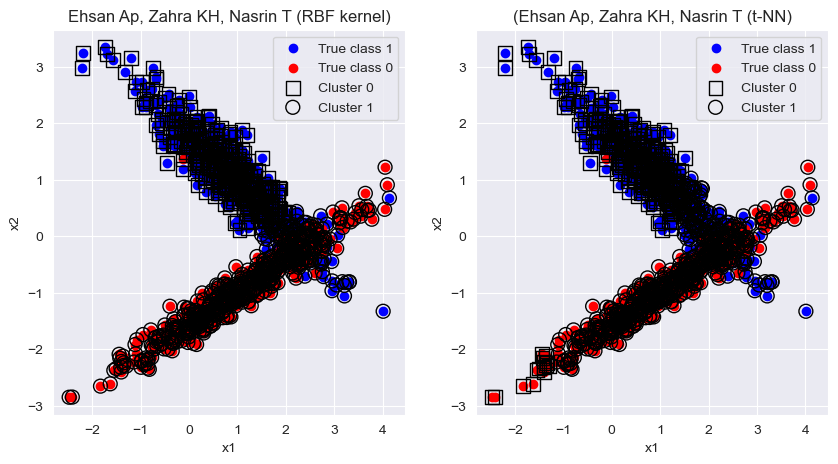

In [88]:
X = twogaussians42_csv[['x1', 'x2']]
y_true = twogaussians42_csv['label']

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)

sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels_tnn = sc_tnn.fit_predict(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_rbf).unique(), cluster_markers):
    mask = labels_rbf == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (RBF kernel)')
ax[0].legend()

for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_tnn).unique(), cluster_markers):
    mask = labels_tnn == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('(Ehsan Ap, Zahra KH, Nasrin T (t-NN)')
ax[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

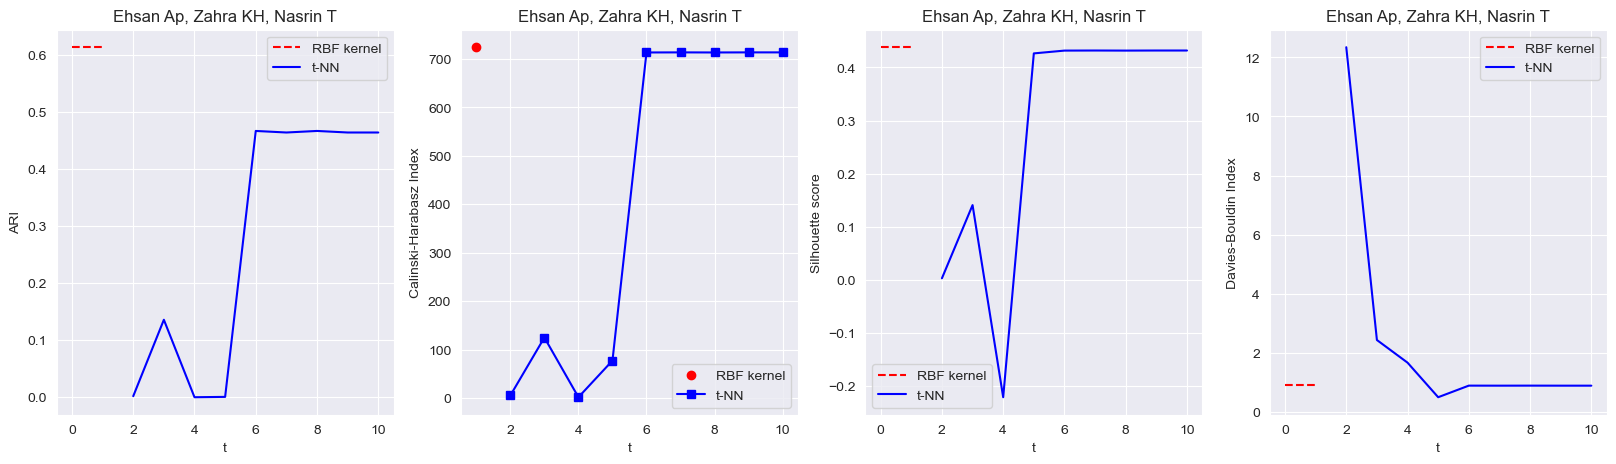

In [52]:
X = twogaussians42_csv[['x1', 'x2']]
y_true = twogaussians42_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ari_rbf = adjusted_rand_score(y_true, labels_rbf)
# ami_rbf = adjusted_mutual_info_score(y_true, labels_rbf)
sil_rbf = silhouette_score(X, labels_rbf)
db_rbf = davies_bouldin_score(X, labels_rbf)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ari_tnn = []
ami_tnn = []
sil_tnn = []
db_tnn = []
ch_tnn = []

for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ari_tnn.append(adjusted_rand_score(y_true, labels_tnn))
    # ami_tnn.append(adjusted_mutual_info_score(y_true, labels_tnn))
    db_tnn.append(davies_bouldin_score(X, labels_tnn))
    sil_tnn.append(silhouette_score(X, labels_tnn))
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot([0, 1], [ari_rbf, ari_rbf], 'r--', label='RBF kernel')
ax[0].plot(t_range, ari_tnn, 'b-', label='t-NN')
ax[0].set_xlabel('t')
ax[0].set_ylabel('ARI')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[0].legend()
ax[1].plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax[1].plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax[1].set_xlabel('t')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[1].legend()
ax[2].plot([0, 1], [sil_rbf, sil_rbf], 'r--', label='RBF kernel')
ax[2].plot(t_range, sil_tnn, 'b-', label='t-NN')
ax[2].set_xlabel('t')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[2].legend()
ax[3].plot([0, 1], [db_rbf, db_rbf], 'r--', label='RBF kernel')
ax[3].plot(t_range, db_tnn, 'b-', label='t-NN')
ax[3].set_xlabel('t')
ax[3].set_ylabel('Davies-Bouldin Index')
ax[3].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[3].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

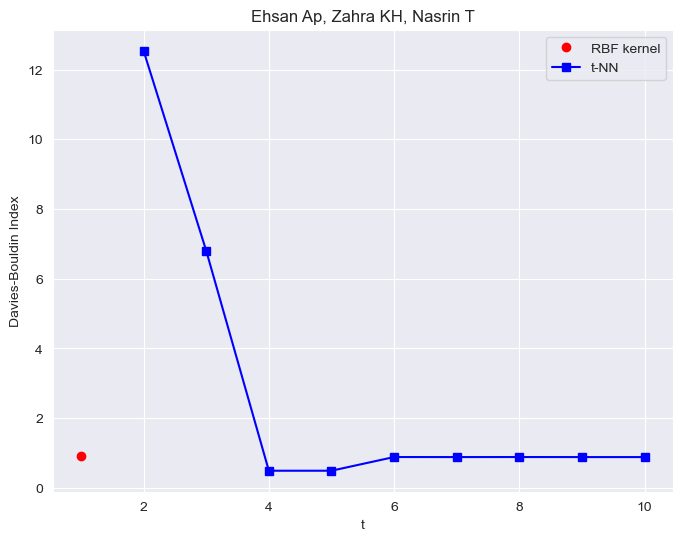

In [53]:
X = twogaussians42_csv[['x1', 'x2']]
y_true = twogaussians42_csv['label']

t_range = range(2, 11)

db_rbf = davies_bouldin_score(X, labels_rbf)

db_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    db_tnn.append(davies_bouldin_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [db_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, db_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Davies-Bouldin Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

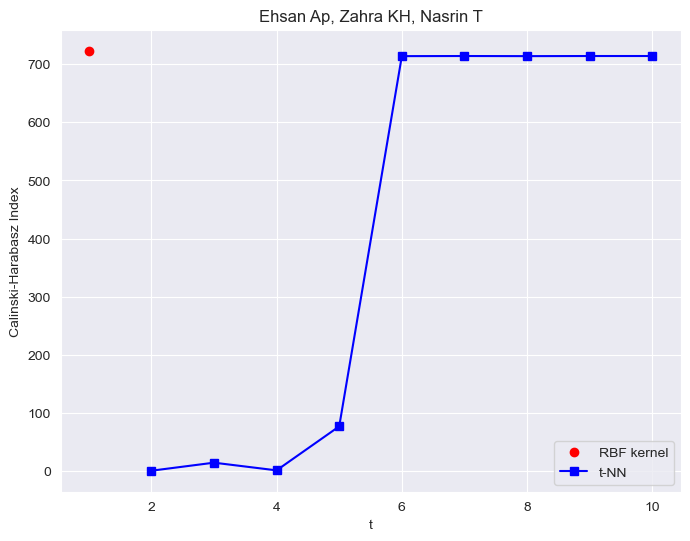

In [54]:
X = twogaussians42_csv[['x1', 'x2']]
y_true = twogaussians42_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ch_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Calinski-Harabasz Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()

# Halfkernel

# K-means with Different Distance

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

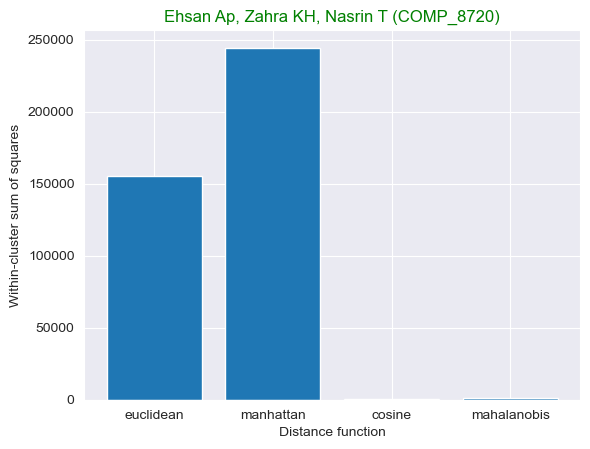

In [55]:
X = halfkernel_csv[['x1', 'x2']].values
y = halfkernel_csv['label'].values

distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

wss_values = []
for distance_function in distance_functions:
    if distance_function == 'manhattan':
        dists = pairwise_distances(X, metric='manhattan')
    else:
        dists = pairwise_distances(X, metric=distance_function)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    wss = sum(np.min(dists[:, kmeans.labels_], axis=1)**2)
    wss_values.append(wss)

fig, ax = plt.subplots()
ax.bar(distance_functions, wss_values)
ax.set_xlabel('Distance function')
ax.set_ylabel('Within-cluster sum of squares')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Kmeans with Different Distance Plot

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

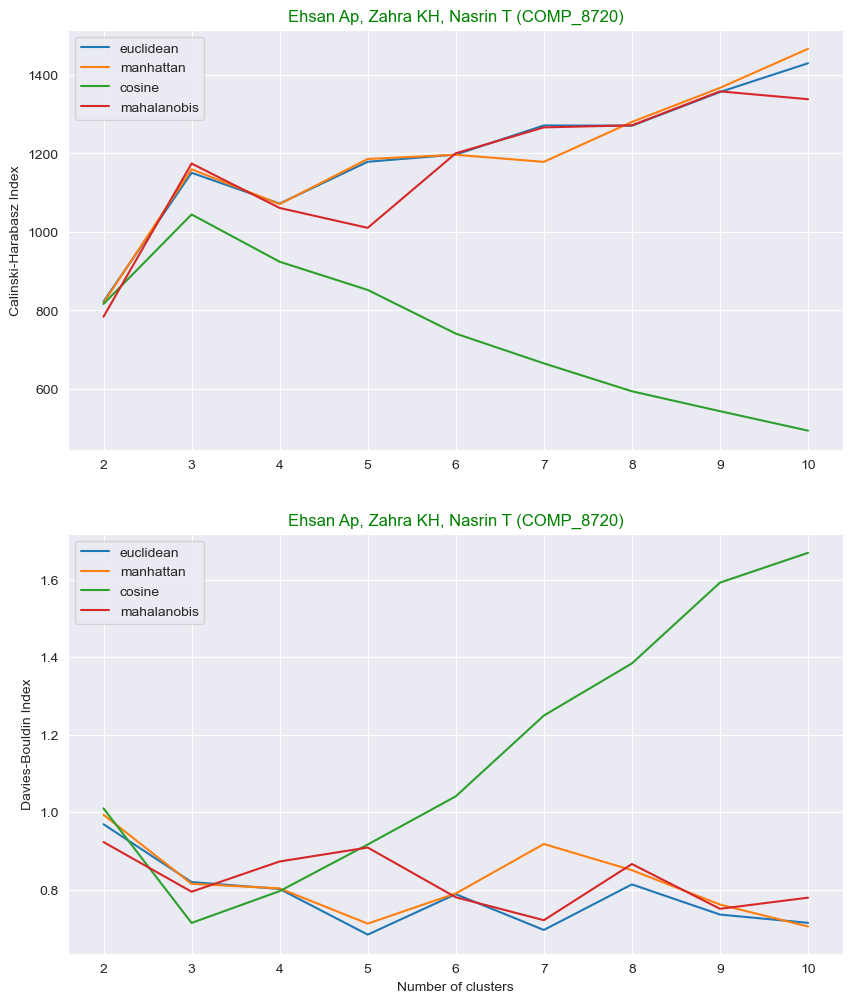

In [74]:
X = halfkernel_csv[['x1', 'x2']].values
y = halfkernel_csv['label'].values

n_clusters_range = range(2, 11)
distance_functions = ['euclidean', 'manhattan', 'cosine', 'mahalanobis']

ch_scores = {}
# silhouette_scores = {}
db_scores = {}

for dist_func in distance_functions:
    ch_scores[dist_func] = []
    # silhouette_scores[dist_func] = []
    db_scores[dist_func] = []

    for n_clusters in n_clusters_range:
        if dist_func == 'mahalanobis':
            dist_matrix = pairwise_distances(X, metric=dist_func, VI=np.linalg.inv(np.cov(X.T)))
        else:
            dist_matrix = pairwise_distances(X, metric=dist_func)
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dist_matrix)

        ch_scores[dist_func].append(calinski_harabasz_score(X, kmeans.labels_))
        # silhouette_scores[dist_func].append(silhouette_score(X, kmeans.labels_))
        db_scores[dist_func].append(davies_bouldin_score(X, kmeans.labels_))

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
x = list(n_clusters_range)

for dist_func in distance_functions:
    axes[0].plot(x, ch_scores[dist_func], label=dist_func)
    # axes[1].plot(x, silhouette_scores[dist_func], label=dist_func)
    axes[1].plot(x, db_scores[dist_func], label=dist_func)

axes[0].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[0].set_ylabel("Calinski-Harabasz Index")
axes[0].legend()
# axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
# axes[1].set_ylabel("Silhouette score")
# axes[1].legend()
axes[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
axes[1].set_xlabel("Number of clusters")
axes[1].set_ylabel("Davies-Bouldin Index")
axes[1].legend()
plt.show()

In [57]:
X = halfkernel_csv[['x1', 'x2']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

db_scores = []
di_scores = []
ch_scores = []
i_scores = []
xb_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    xb_scores.append(np.sum(min_distances**2) / (k * np.sum(distances**2)))
    i_scores.append(silhouette_score(X, kmeans.labels_, random_state=48))
    #
    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    center_distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
    intercluster_distances = np.max(center_distances)
    intracluster_distances = np.min(min_distances)
    di_scores.append(intercluster_distances / intracluster_distances)


scores_table = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Davies-Bouldin Index': db_scores,
    'Dunn’s Index': di_scores,
    'Calinski-Harabasz Index': ch_scores,
    'Index I': i_scores,
    'Xie-Beni Index': xb_scores
})

print(scores_table)

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

   Number of Clusters  Davies-Bouldin Index  Dunn’s Index  \
0                   2              1.024780     32.387371   
1                   3              0.782001     37.219510   
2                   4              0.843755     74.571287   
3                   5              0.827743    112.776714   
4                   6              0.659308    304.586102   
5                   7              0.725910    490.217321   
6                   8              0.778112    171.205571   
7                   9              0.744217    190.454915   
8                  10              0.694125    205.568684   

   Calinski-Harabasz Index   Index I  Xie-Beni Index  
0               783.986560  0.417179        0.104562  
1              1173.886605  0.461018        0.020117  
2              1111.805524  0.438382        0.007855  
3              1138.630199  0.396488        0.003762  
4              1264.158360  0.472567        0.001985  
5              1295.783014  0.449580        0.001170  
6   

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


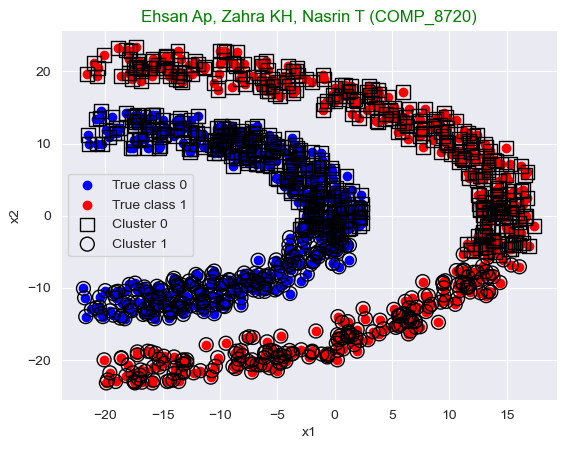

In [91]:
X = halfkernel_csv[['x1', 'x2']]
y_true = halfkernel_csv['label']

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(set(kmeans.labels_), cluster_markers):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

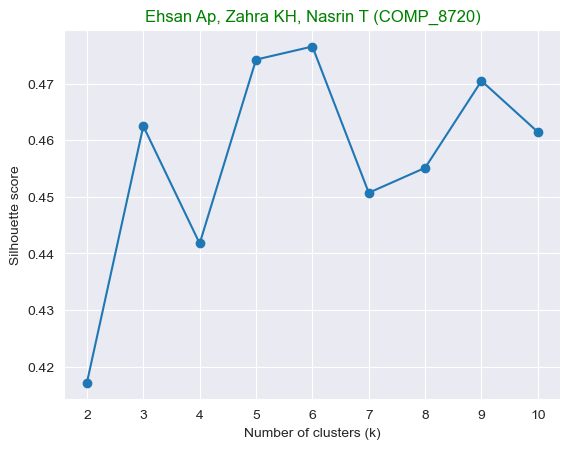

The best value of k is 6


In [59]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_halfkernel)
    score = silhouette_score(X_halfkernel, labels)
    silhouette_scores.append(score)

fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_scores, '-o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best value of k is {best_k}')

# EM

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


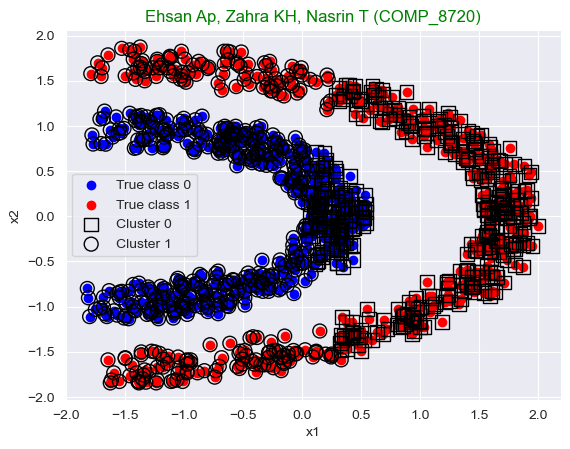

In [90]:
x_halfkernel_col = halfkernel_csv
x_halfkernel_col = x_halfkernel_col.drop('label', axis=1)
scaler_halfkernel = preprocessing.StandardScaler()
scaler_halfkernel.fit(X_halfkernel)
scaled_X = scaler_halfkernel.transform(X_halfkernel)

xs = pd.DataFrame(scaled_X, columns=x_halfkernel_col.columns)

from sklearn.mixture import GaussianMixture

gmm_halfkernel = GaussianMixture(n_components=2)
gmm_y_halfkernel = gmm_halfkernel.fit_predict(xs)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(xs)
labels = gmm.predict(xs)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(list(set(labels)), cluster_markers):
    mask = labels == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [61]:
X = halfkernel_csv[['x1', 'x2']].values
y = halfkernel_csv['label'].values
gmm = GaussianMixture(n_components=2, random_state=42)
labels = gmm.fit_predict(X)
ari = adjusted_rand_score(halfkernel_csv['label'], labels)
ami = adjusted_mutual_info_score(halfkernel_csv['label'], labels)
sil = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)
ch_index = calinski_harabasz_score(X, labels)

print('Adjusted Rand Index (ARI):', ari)
print('Adjusted Mutual Information (AMI):', ami)
print('Silhouette Coefficient:', sil)
print('Davies Bouldin Score:', db_index)
print('Calinski Harabasz Score:', ch_index)

Adjusted Rand Index (ARI): -0.0009875648550854185
Adjusted Mutual Information (AMI): -0.0007227700570881924
Silhouette Coefficient: 0.4116934561161615
Davies Bouldin Score: 0.998094438449702
Calinski Harabasz Score: 820.6276169080147


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

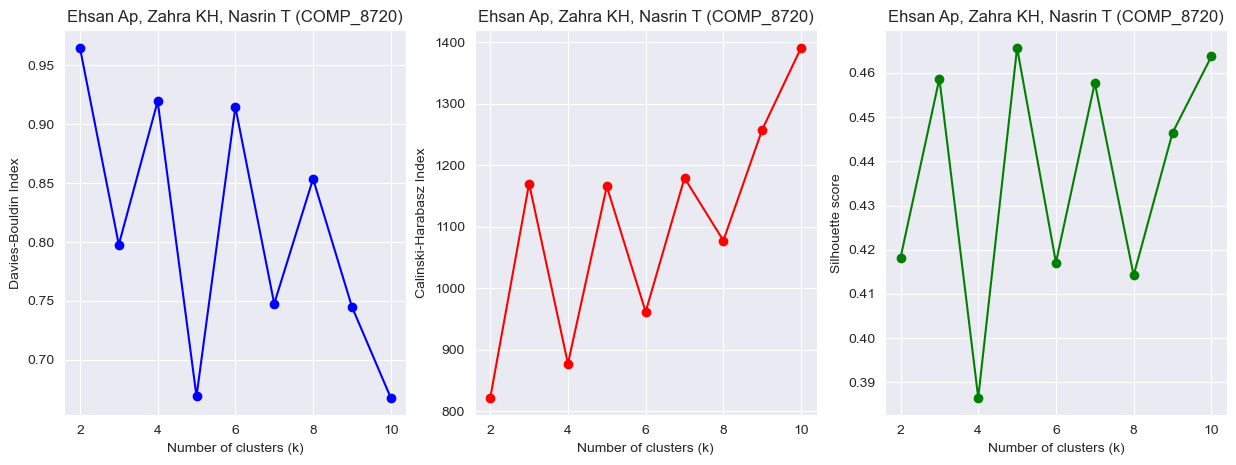

In [62]:
X = halfkernel_csv[['x1', 'x2']].values

k_range = range(2, 11)

db_scores = []
ch_scores = []
sil_scores = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(X)
    labels = gmm.predict(X)

    db_score = davies_bouldin_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    sil_score = silhouette_score(X, labels)

    db_scores.append(db_score)
    ch_scores.append(ch_score)
    sil_scores.append(sil_score)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(k_range, db_scores, 'bo-')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Davies-Bouldin Index')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[1].plot(k_range, ch_scores, 'ro-')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

ax[2].plot(k_range, sil_scores, 'go-')
ax[2].set_xlabel('Number of clusters (k)')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

plt.show()

# Spectural

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


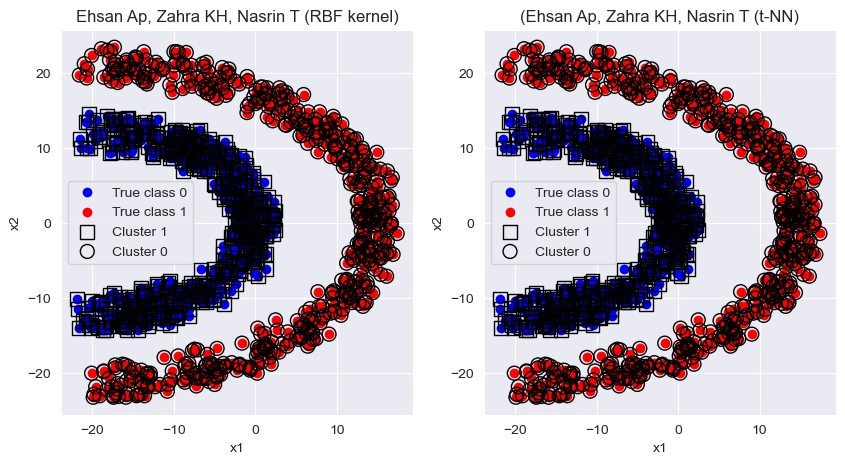

In [89]:
X = halfkernel_csv[['x1', 'x2']]
y_true = halfkernel_csv['label']

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)

sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels_tnn = sc_tnn.fit_predict(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_rbf).unique(), cluster_markers):
    mask = labels_rbf == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (RBF kernel)')
ax[0].legend()

for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_tnn).unique(), cluster_markers):
    mask = labels_tnn == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('(Ehsan Ap, Zahra KH, Nasrin T (t-NN)')
ax[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

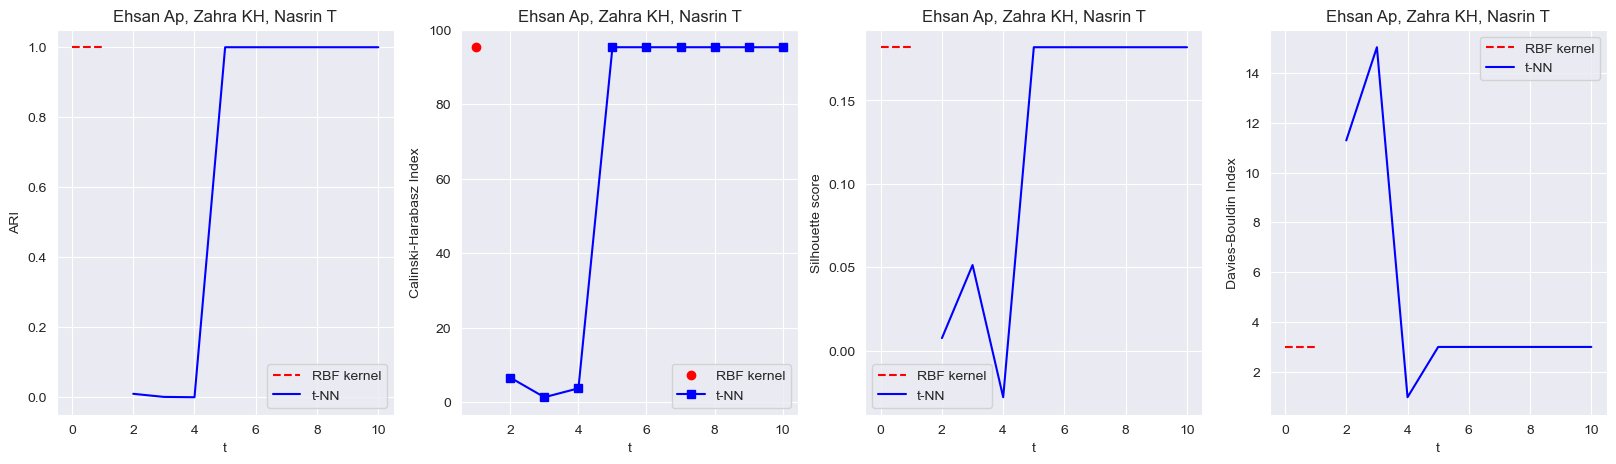

In [64]:
X = halfkernel_csv[['x1', 'x2']]
y_true = halfkernel_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ari_rbf = adjusted_rand_score(y_true, labels_rbf)
# ami_rbf = adjusted_mutual_info_score(y_true, labels_rbf)
sil_rbf = silhouette_score(X, labels_rbf)
db_rbf = davies_bouldin_score(X, labels_rbf)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ari_tnn = []
ami_tnn = []
sil_tnn = []
db_tnn = []
ch_tnn = []

for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ari_tnn.append(adjusted_rand_score(y_true, labels_tnn))
    # ami_tnn.append(adjusted_mutual_info_score(y_true, labels_tnn))
    db_tnn.append(davies_bouldin_score(X, labels_tnn))
    sil_tnn.append(silhouette_score(X, labels_tnn))
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot([0, 1], [ari_rbf, ari_rbf], 'r--', label='RBF kernel')
ax[0].plot(t_range, ari_tnn, 'b-', label='t-NN')
ax[0].set_xlabel('t')
ax[0].set_ylabel('ARI')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[0].legend()
ax[1].plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax[1].plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax[1].set_xlabel('t')
ax[1].set_ylabel('Calinski-Harabasz Index')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[1].legend()
ax[2].plot([0, 1], [sil_rbf, sil_rbf], 'r--', label='RBF kernel')
ax[2].plot(t_range, sil_tnn, 'b-', label='t-NN')
ax[2].set_xlabel('t')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[2].legend()
ax[3].plot([0, 1], [db_rbf, db_rbf], 'r--', label='RBF kernel')
ax[3].plot(t_range, db_tnn, 'b-', label='t-NN')
ax[3].set_xlabel('t')
ax[3].set_ylabel('Davies-Bouldin Index')
ax[3].set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax[3].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

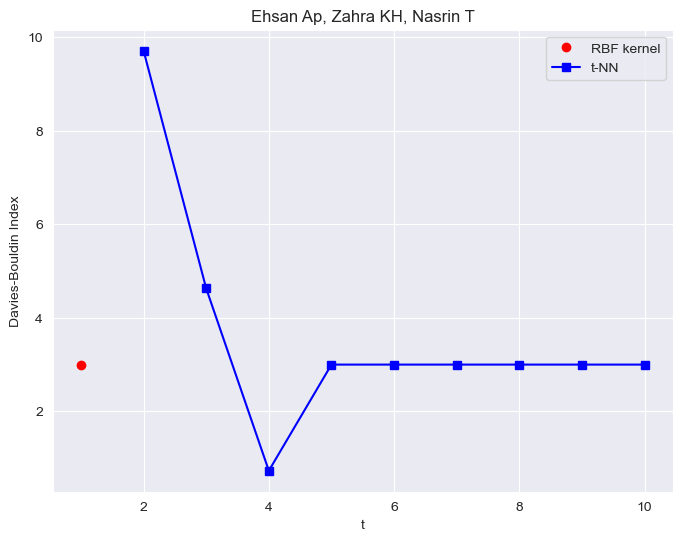

In [65]:
X = halfkernel_csv[['x1', 'x2']]
y_true = halfkernel_csv['label']

t_range = range(2, 11)

db_rbf = davies_bouldin_score(X, labels_rbf)

db_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    db_tnn.append(davies_bouldin_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [db_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, db_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Davies-Bouldin Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-pack

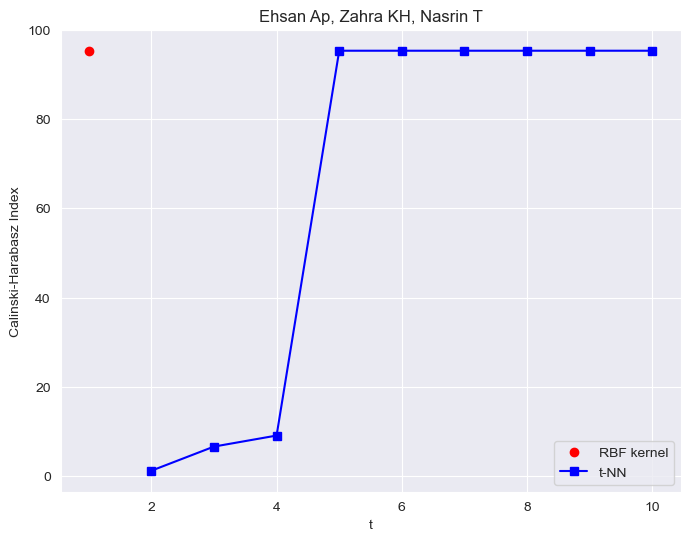

In [66]:
X = halfkernel_csv[['x1', 'x2']]
y_true = halfkernel_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ch_rbf = calinski_harabasz_score(X, labels_rbf)

ch_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ch_tnn.append(calinski_harabasz_score(X, labels_tnn))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot([1], [ch_rbf], 'ro', label='RBF kernel')
ax.plot(t_range, ch_tnn, 'bs-', label='t-NN')
ax.set_xlabel('t')
ax.set_ylabel('Calinski-Harabasz Index')
ax.set_title('Ehsan Ap, Zahra KH, Nasrin T')
ax.legend()
plt.show()